## 원본 데이터 로드 및 일부 전처리

In [17]:
import pandas as pd

result_check = pd.read_csv('final_df.csv')
result_check['study_id'].nunique()

3269

In [18]:
import pandas as pd
raw_gpt4 = pd.read_csv('./gpt4_result.csv')
import re
def deletion_edit_filter(text):
    # Return an empty string if text is not a string
    if not isinstance(text, str):
        return ""
    
    # List of patterns and replacements
    replacements = [
        ('distal nasogastric tube', ''),
        ('or', ''),
        # ('ap window', ''),
        ('more ', ''),
        ('home', ''),
        ('tongue', ''),
        # ('pylorus', ''),
        # ('region of the pylorus', ''),
        # ('post-pyloric', ''),
        ('axial', ''),
        ('visible', ''),
        ('local', ''),
        ('shower', ''),
        ('at the skin', ''),
        ('leg', ''),
        ('legs', ''),
        ('right legs', ''),
        ('focal', ''),
        ('main', ''),
        ('partially imaged', ''),
        ('aerated', ''),
        ('site', ''),
        ('elsewhere', ''),
        ('loops', ''),
        ('throughout', ''),
        ('remainder', ''),
        ('lateral-most component', ''),
        ('lateral and frontal radiograph', ''),
        ('lateral view', ''),
        ('lateral radiograph', ''),
        ('frontal view', ''),
        ('remaining', ''),
        ('to the level of', ''),
        ('standard position', ''),        
        ('r aka stump', ''),
        ('r aka', ''),
        ('ccu', ''),
        ('icu', ''),
        # ('standard placement', ''),
        # ('standard placements', ''),
        # ('standard locations', ''),
        # ('standard', ''),
        # ('expected locations', ''),
        # ('expected course of the', ''),
        # ('expected location for a persistent', ''),
        # ('expected location of', ''),
        ('external', ''),
        ('scalp ', ''),
        ('right hip ', ''),
        # ('right upper arm ', ''),        
        # ('right glenoid fossa', ''),        
        ('right knee', ''),        
        ('left foot', ''),        
        ('rle', ''),
        # ('above the level of the effusion', ''),
        # ('left arm', ''),
        # ('r arm', ''),
        ('r toe', ''),        
        ('entire torso', ''),
        ('ankles', ''),
        ('right ankle', ''),
        ('that location', ''),
        ('appropriate', ''),
        ('rest of the', ''),
        ('regional', ''),
        ('persistent', ''),
        ('all areas', ''),
        ('head', ''),
        # ('neck', ''),
        ('reing', ''),
        # ('region of the pylorus', ''),
        # ('pylorus', ''),
        ('postoperative', ''),
        # ('area of the biopsies', ''),
        # ('diaphragmatic hiatus', ''),
        # ('hiatus', ''),
        ('femal', ''),
        ('thax', ''),
        (' position', ''),
        ('left fifth toe', ''),
        ('between the', ''),
        ('region of the', ''),
        ('insertion  of the catheter', ''),
        
        # ('b/l upper lobe', 'bilateral left upper lobe'),
        # ('right ij', 'right internal jugular'),
        # ('cp angle', 'costophrenic angle'),                
        # ('ra', 'right atrium'),                
        # ('l and r', 'bilateral'),
        # ('r lung base', 'right lung base'),
        # ('on either side', 'bilateral'),
        # ('both', 'bilateral'),
        # ('spinal column', 'spine'),
        # ('ge junction', 'gastroesophageal junction'),
        # ('body', 'bodies'),
        # ('r base', 'right base'),
        # ('mid rv', 'mid right ventricular'),
        # ('atriume', 'atrium'),
        # ('l upper lone', 'left upper lung'),
        # ('l lower lung', 'left lower lung'),
        # ('lll', 'left lower lung'),
        # ('rll', 'right lower lung'),
        # ('luq', 'left upper quadrant'),
        # ('ruq', 'right upper quadrant'),
        # ('r-sided', 'right-sided'),
        # ('loops of bowel', 'abdomen'),
    ]
    
    


    # Apply all replacements using formatted patterns
    for original, replacement in replacements:
        pattern = r'\b{}\b'.format(original)
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
    
    return text


def remove_extra_spaces(text):
    if isinstance(text, str):
        return re.sub(r'\s+', ' ', text).strip()
    return text

# DataFrame의 특정 열에 함수 적용

# 'ent' 컬럼에 대해 사용자 정의 함수 적용
raw_gpt4['location'] = raw_gpt4['location'].apply(deletion_edit_filter)

raw_gpt4['location'] = raw_gpt4['location'].apply(remove_extra_spaces)


check_out = raw_gpt4['location'].str.contains('bibasal left than right', na=False, regex=True)
raw_gpt4.loc[check_out, 'location'] = ''
raw_gpt4.loc[check_out, 'comparision'] = 'bibasal left than right'

check_out = raw_gpt4['location'].str.contains('left than right basal', na=False, regex=True)
raw_gpt4.loc[check_out, 'location'] = ''
raw_gpt4.loc[check_out, 'comparision'] = 'left than right basal'

check_out = raw_gpt4['location'].str.contains('right side than left', na=False, regex=True)
raw_gpt4.loc[check_out, 'location'] = ''
raw_gpt4.loc[check_out, 'comparision'] = 'right side than left'

check_out = raw_gpt4['location'].str.contains('lower lung right greater than left', na=False, regex=True)
raw_gpt4.loc[check_out, 'location'] = ''
raw_gpt4.loc[check_out, 'comparision'] = 'lower lung right greater than left'


check_out = raw_gpt4['location'].str.contains('right greater than left', na=False, regex=True)
raw_gpt4.loc[check_out, 'location'] = ''
raw_gpt4.loc[check_out, 'comparision'] = 'right greater than left'

check_out = raw_gpt4['location'].str.contains('left greater than right', na=False, regex=True)
raw_gpt4.loc[check_out, 'location'] = ''
raw_gpt4.loc[check_out, 'comparision'] = 'left greater than right'

contains_diffuse = raw_gpt4['location'].str.contains('diffuse', na=False, regex=True)
raw_gpt4.loc[contains_diffuse, 'location'] = ''
raw_gpt4.loc[contains_diffuse, 'distribution'] = raw_gpt4.loc[contains_diffuse, 'distribution'].apply(
    lambda x: "diffuse" if pd.isna(x) else (x if "diffuse" in x.lower() else (x + ", " + "diffuse"))
)

# check_out = raw_gpt4['location'].str.contains('media', na=False, regex=True)
# raw_gpt4[check_out][['location', 'normalized_location', 'radlex_location', '0_spacy_location_norm', '1_spacy_location_norm', 'CI_location_norm', 'final_loc_norm', 'loc_desc1', 'loc_desc2']]
display(raw_gpt4[raw_gpt4 ['study_id'] == 's50331901'][['ent', 'sent']])

# print(len(original_gpt4_preprocessed_df['ent'].unique()))
# print(len(original_gpt4_preprocessed_df['location'].unique()))
# print(len(original_gpt4_preprocessed_df['morphology'].unique()))
# print(len(original_gpt4_preprocessed_df['distribution'].unique()))
# print(len(original_gpt4_preprocessed_df['size'].unique()))
# print(len(original_gpt4_preprocessed_df['num'].unique()))
# print(len(original_gpt4_preprocessed_df['severity'].unique()))
# # print(len(original_gpt4_preprocessed_df['comparision'].unique()))
# print(len(original_gpt4_preprocessed_df['emerge'].unique()))
# print(len(original_gpt4_preprocessed_df['no change'].unique()))
# print(len(original_gpt4_preprocessed_df['improved'].unique()))
# print(len(original_gpt4_preprocessed_df['worsened'].unique()))
# print(len(original_gpt4_preprocessed_df['reposition'].unique()))
# print("other source", len(original_gpt4_preprocessed_df['other source'].unique()))
# print(len(original_gpt4_preprocessed_df['resolve'].unique()))

# print(len(original_gpt4_preprocessed_df['morphology'].unique())+
#       len(original_gpt4_preprocessed_df['distribution'].unique())+
#       len(original_gpt4_preprocessed_df['size'].unique())+
#       len(original_gpt4_preprocessed_df['num'].unique())+
#       len(original_gpt4_preprocessed_df['severity'].unique())+
#       # len(original_gpt4_preprocessed_df['comparision'].unique())+
#       len(original_gpt4_preprocessed_df['emerge'].unique())+
#       len(original_gpt4_preprocessed_df['no change'].unique())+
#       len(original_gpt4_preprocessed_df['improved'].unique())+
#       len(original_gpt4_preprocessed_df['worsened'].unique())+
#       len(original_gpt4_preprocessed_df['reposition'].unique())+
#       len(original_gpt4_preprocessed_df['other source'].unique())+
#       len(original_gpt4_preprocessed_df['resolve'].unique()))


,ent,sent
0,Intubated,Intubated-year-old woman. Check tube placement.
1,endotracheal tube,AP chest compared to : Tip of the endotracheal...
2,lungs,Lungs are clear.
3,cardiomediastinal silhouettes,Cardiomediastinal and hilar silhouettes and pl...
4,hilar silhouettes,Cardiomediastinal and hilar silhouettes and pl...
5,pleural surfaces,Cardiomediastinal and hilar silhouettes and pl...


## Entity 오류 검증.


In [19]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
# CSV 파일 읽기
ent_df = pd.read_csv('entity.csv')

display(ent_df.head(2))
# 빈 Cat (normalized obs.) 값을 가진 행 제거
# ent_df = ent_df.dropna(subset=['Cat (normalized obs.)'])

# 데이터 구조화
structure = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for _, row in ent_df.iterrows():
    final_cat = row['Final_cat']
    cat_norm = row['Cat (normalized obs.)']
    gt_entity = row['GT Entity (low-level)']
    raw_data = row['raw_data']
    
    structure[final_cat][cat_norm][gt_entity].append(raw_data)

# 통계 계산
final_cat_count = len(structure)
cat_norm_count = sum(len(cat_norms) for cat_norms in structure.values())
gt_entity_count = sum(sum(len(gt_entities) for gt_entities in cat_norms.values()) for cat_norms in structure.values())
raw_data_count = sum(sum(sum(len(raw_datas) for raw_datas in gt_entities.values()) for gt_entities in cat_norms.values()) for cat_norms in structure.values())

# 결과 출력
print(f"최상위 키 (Final_cat) 개수: {final_cat_count}")
print(f"두 번째 키 (Cat (normalized obs.)) 개수: {cat_norm_count}")
print(f"세 번째 키 (GT Entity (low-level)) 개수: {gt_entity_count}")
print(f"가장 세부적인 내용 (raw_data) 개수: {raw_data_count}")

print("\n각 Final_cat별 Cat (normalized obs.) 개수:")
for final_cat, cat_norms in structure.items():
    print(f"{final_cat}: {len(cat_norms)}개")

# 일관성 체크를 위한 중복 항목 확인
duplicates = defaultdict(list)
for final_cat, cat_norms in structure.items():
    for cat_norm in cat_norms:
        duplicates[cat_norm].append(final_cat)

print("\nContradictory cases: 여러 Final_cat에 나타나는 Cat (normalized obs.):")
for cat_norm, final_cats in duplicates.items():
    if len(final_cats) > 1:
        print(f"{cat_norm}: {', '.join(final_cats)}")

print("------------------")
# structure



,raw_data,GT Entity (low-level),Cat (normalized obs.),super category,super super cat,Final_cat
0,abdominal hernia,hernia,hernia,NaN,NaN,CF
1,abscess,abscess,abscess,infection,pathophysiologic finding,CF


최상위 키 (Final_cat) 개수: 9
두 번째 키 (Cat (normalized obs.)) 개수: 2788
세 번째 키 (GT Entity (low-level)) 개수: 3116
가장 세부적인 내용 (raw_data) 개수: 4714

각 Final_cat별 Cat (normalized obs.) 개수:
CF: 376개
LF: 380개
PF: 224개
NCD: 239개
PF/CF: 1개
COF: 154개
COF/NCD: 1개
SYM: 326개
OTH: 1087개

Contradictory cases: 여러 Final_cat에 나타나는 Cat (normalized obs.):
lesion: LF, PF
osseous lesion: LF, PF
process: LF, PF
------------------


## Entity vocab 반영 및 분석.

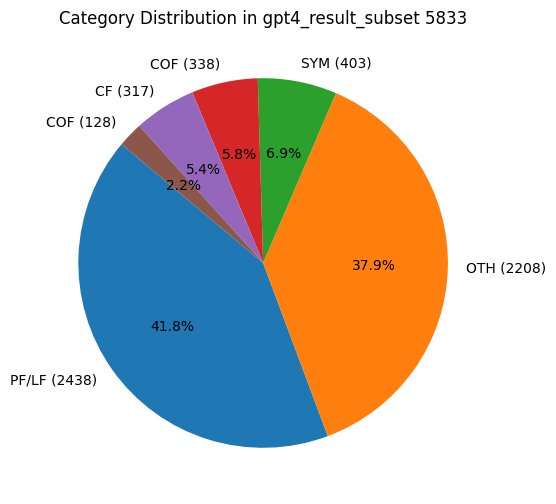

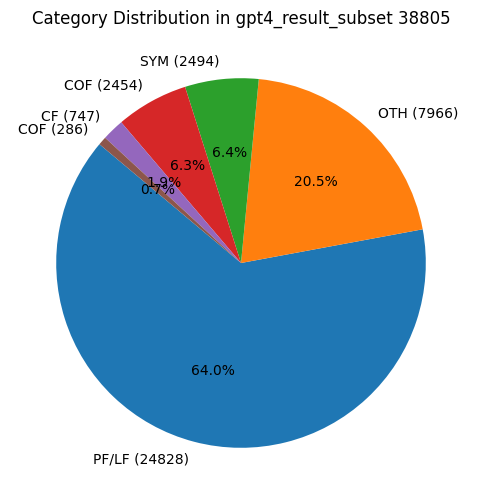

(5269, 7)

In [20]:
unique_gpt4 = raw_gpt4.drop_duplicates(subset=['ent', 'cat'])

unique_ents = unique_gpt4['ent'].unique()
unique_cats = unique_gpt4['cat'].unique()

# Calculate the count of unique values for 'ent' and 'cat'
ent_count = len(unique_ents)
cat_count = len(unique_cats)

# Group by 'cat' to get counts for the pie chart
cat_counts = unique_gpt4['cat'].value_counts()

# Group by 'category' in loc_analysis_subset to get counts for the pie chart
loc_cat_counts = ent_df['Final_cat'].value_counts()

import matplotlib.pyplot as plt
# Plot pie chart for 'cat' in gpt4_result_subset with absolute values
label_mapping = {
    'ROF': 'PF/LF',
    'RSF': 'CF',
    'OBS': 'COF'
}

# Function to map the labels
def map_labels(label):
    return label_mapping.get(label, label)

# Apply the mapping and create the pie chart
plt.figure(figsize=(10, 6))
mapped_labels = [map_labels(label) for label in cat_counts.index]
plt.pie(cat_counts, labels=[f'{mapped_label} ({count})' for mapped_label, count in zip(mapped_labels, cat_counts)], autopct='%1.1f%%', startangle=140)
plt.title(f'Category Distribution in gpt4_result_subset {len(unique_gpt4)}')
plt.show()

plt.figure(figsize=(10, 6))
mapped_labels = [map_labels(label) for label in cat_counts.index]
plt.pie(raw_gpt4['cat'].value_counts(), labels=[f'{mapped_label} ({count})' for mapped_label, count in zip(mapped_labels, raw_gpt4['cat'].value_counts())], autopct='%1.1f%%', startangle=140)
plt.title(f'Category Distribution in gpt4_result_subset {len(raw_gpt4)}')
plt.show()


ent_count, cat_count


In [21]:
# Split the 'raw_data' column by comma and explode the dataframe to have each value in its own row
ent_df['raw_data'] = ent_df['raw_data'].astype(str).str.split(',')
ent_df = ent_df.explode('raw_data').reset_index(drop=True)
ent_df['raw_data'] = ent_df['raw_data'].str.strip()

ent_df['raw_data'] = ent_df['raw_data'].str.lower().str.strip()
ent_df['GT Entity (low-level)'] = ent_df['GT Entity (low-level)'].str.lower().str.strip()

# Create a dictionary for mapping
ent_mapping = ent_df.set_index('raw_data')['GT Entity (low-level)'].to_dict()
ent_cat_mapping = ent_df.set_index('raw_data')['Final_cat'].to_dict()

raw_gpt4['ent'] = raw_gpt4['ent'].str.lower().str.strip()


# Replace values in the 'ent' column of raw_gpt4 based on the mapping
raw_gpt4_updated = raw_gpt4.copy()
raw_gpt4_updated['ent'] = raw_gpt4_updated['ent'].map(ent_mapping)
raw_gpt4_updated['ent'].fillna(raw_gpt4['ent'], inplace=True)
raw_gpt4_updated['cat'] = raw_gpt4_updated['ent'].map(ent_cat_mapping)


comparison_df = pd.DataFrame({
    'Before': raw_gpt4['ent'],
    'After': raw_gpt4_updated['ent']
})

# Display the rows where the 'ent' values were changed
changed_ents = comparison_df[comparison_df['Before'] != comparison_df['After']]

In [22]:
def contains_uppercase(s):
    return bool(re.search(r'[A-Z]', s))

# Apply the function to the 'ent' column and filter the dataframe
raw_gpt4_updated['ent'] = raw_gpt4_updated['ent'].astype(str)

# Function to check if a string contains any uppercase letters
def contains_uppercase(s):
    return bool(re.search(r'[A-Z]', s))

# Apply the function to the 'ent' column and filter the dataframe
uppercase_entries = raw_gpt4_updated[raw_gpt4_updated['ent'].apply(contains_uppercase)]

# Display unique entries with uppercase letters
uppercase_entries_unique = uppercase_entries['ent'].unique()

uppercase_entries_unique


array([], dtype=object)

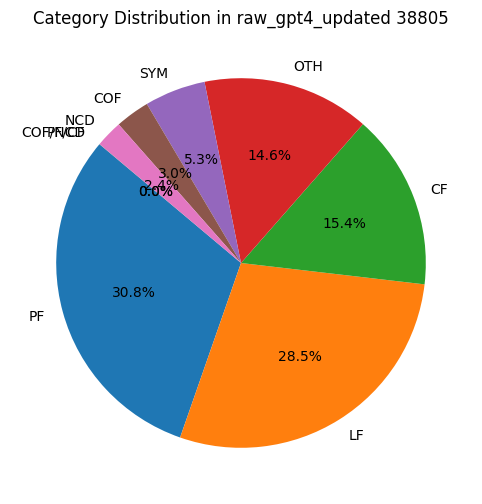

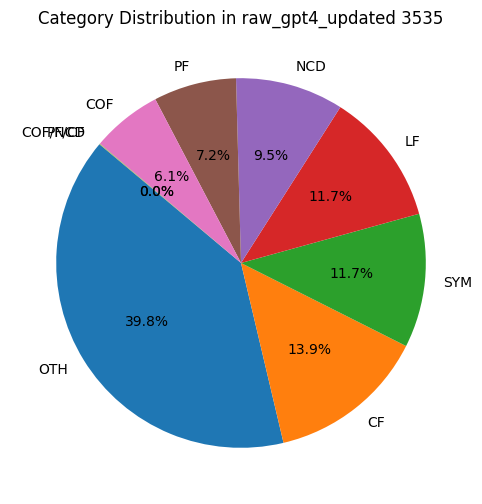

In [23]:
raw_gpt4['ent'].head(), raw_gpt4_updated['ent'].head(), changed_ents

check = raw_gpt4_updated.drop_duplicates(['ent', 'cat'])


plt.figure(figsize=(10, 6))
plt.pie(raw_gpt4_updated['cat'].value_counts(), labels=raw_gpt4_updated['cat'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title(f'Category Distribution in raw_gpt4_updated {len(raw_gpt4_updated)}')
plt.show()


plt.figure(figsize=(10, 6))
plt.pie(check['cat'].value_counts(), labels=check['cat'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title(f'Category Distribution in raw_gpt4_updated {len(check)}')
plt.show()


In [24]:
raw_gpt4_updated[raw_gpt4_updated['cat'].isna()].drop_duplicates(subset=['ent', 'cat'])[['ent', 'cat']]

,ent,cat
14,ap radiograph,NaN
31,conglomerate,NaN
42,frontal and lateral views,NaN
63,motion artifact,NaN
77,prior study,NaN
...,...,...
37618,dr phone,NaN
37938,mr,NaN
38378,pa view,NaN
38519,ap erect portable view,NaN


In [25]:
original_gpt4_preprocessed_df = raw_gpt4_updated.copy()
gpt4_preprocessed_df = original_gpt4_preprocessed_df.copy()


## Location hiearchy 채워넣기

In [26]:
# import pandas as pd
# import re

# def normalize_location(location):
#     location = location.lower().strip()
#     location = re.sub(r'\s+', ' ', location)
#     return location

# def classify_category(location):
#     def check_keywords(keywords):
#         return any(keyword in location for keyword in keywords)

#     respiratory_keywords = ['lung', 'pulmonary', 'bronch', 'trachea', 'airway', 'carina', 'pleura', 'diaphragm']
#     cardiovascular_keywords = ['heart', 'cardi', 'aort', 'vena cava', 'atri', 'ventricle', 'svc', 'ivc']
#     musculoskeletal_keywords = ['rib', 'stern', 'clavicle', 'scapula', 'spine', 'vertebra', 'humerus']
#     abdominal_keywords = ['stomach', 'bowel', 'intestine', 'colon', 'liver', 'spleen', 'abdomen']
#     adjacent_keywords = ['shoulder', 'axilla']
#     thoracic_keywords = ['mediastin', 'hemithorax', 'chest wall']

#     if check_keywords(respiratory_keywords):
#         super_super_category = 'Respiratory System'
#     elif check_keywords(cardiovascular_keywords):
#         super_super_category = 'Cardiovascular System'
#     elif check_keywords(musculoskeletal_keywords):
#         super_super_category = 'Musculoskeletal System'
#     elif check_keywords(abdominal_keywords):
#         super_super_category = 'Abdominal Structures'
#     elif check_keywords(adjacent_keywords):
#         super_super_category = 'Adjacent Structures'
#     elif check_keywords(thoracic_keywords):
#         super_super_category = 'Thoracic Structures'
#     elif 'soft tissue' in location:
#         super_super_category = 'Other Structures'
#     elif 'thoracoabdominal' in location:
#         super_super_category = 'Multiple Systems'
#     else:
#         super_super_category = 'Unclassified'

#     # Determine super category and category (simplified for this example)
#     super_category = super_super_category
#     category = location

#     # Add modifiers
#     modifiers = []
#     if 'left' in location:
#         modifiers.append('Left')
#     if 'right' in location:
#         modifiers.append('Right')
#     if 'bilateral' in location:
#         modifiers.append('Bilateral')
#     if 'upper' in location or 'superior' in location:
#         modifiers.append('Upper')
#     if 'lower' in location or 'inferior' in location:
#         modifiers.append('Lower')
#     if 'medial' in location:
#         modifiers.append('Medial')
#     if 'lateral' in location:
#         modifiers.append('Lateral')

#     if modifiers:
#         category += ' - ' + ', '.join(modifiers)

#     return category, super_category, super_super_category

# # 메인 프로세스
# df = pd.read_csv("classified_locations_improved.csv")
# df['location_normalized'] = df['location'].apply(normalize_location)
# df['new_category'], df['new_super_category'], df['new_super_super_category'] = zip(*df['location_normalized'].apply(classify_category))

# # 결과 비교
# df['category_changed'] = df['category'] != df['new_category']
# df['super_category_changed'] = df['super category'] != df['new_super_category']
# df['super_super_category_changed'] = df['super super category'] != df['new_super_super_category']

# # 변경된 항목 출력
# changed_items = df[df['category_changed'] | df['super_category_changed'] | df['super_super_category_changed']]
# print(f"Changed items: {len(changed_items)}")
# print(changed_items[['location', 'category', 'new_category', 'super category', 'new_super_category', 'super super category', 'new_super_super_category']])

# # 결과 저장 (모든 원본 컬럼 유지)
# output_columns = [
#     'gpt_result', 'location', 'loc_desc1', 'loc_desc2', 'UMLS_normalized',
#     'category', 'super category', 'super super category',
#     'new_category', 'new_super_category', 'new_super_super_category'
# ]
# df[output_columns].to_csv("reclassified_locations_with_original.csv", index=False)

## Location 오류 검증.
- ### UMLS 기준으로 세부 내용들이 잘 분류되었는가?
- ### UMLS 없는 애들 drop했음.

In [27]:
import pandas as pd
from collections import defaultdict

# CSV 파일 읽기
location_df = pd.read_csv('./loc_analysis.csv', encoding='EUC-KR')

# 빈 UMLS_normalized 값을 가진 행 제거
location_df = location_df.dropna(subset=['UMLS_normalized'])

# 데이터 구조화
structure = defaultdict(set)

for _, row in location_df.iterrows():
    umls_normalized = row['UMLS_normalized']
    location = row['location']
    
    structure[umls_normalized].add(location)

# 통계 계산
umls_normalized_count = len(structure)
location_count = sum(len(locations) for locations in structure.values())

# 결과 출력
print(f"최상위 키 (UMLS_normalized) 개수: {umls_normalized_count}")
print(f"두 번째 키 (location) 개수: {location_count}")

print("\n각 UMLS_normalized별 location 개수:")
# for umls_normalized, locations in structure.items():
#     print(f"{umls_normalized}: {len(locations)}개")

# 일관성 체크를 위한 중복 항목 확인
duplicates = defaultdict(list)
for umls_normalized, locations in structure.items():
    for location in locations:
        duplicates[location].append(umls_normalized)

print("\nContradictory cases: 여러 UMLS_normalized에 나타나는 location:")
for location, umls_normalizeds in duplicates.items():
    if len(umls_normalizeds) > 1:
        print(f"{location}: {', '.join(umls_normalizeds)}")

print("------------------")

# UMLS_normalized와 location이 동일한 경우 확인
# same_umls_location = []
# for umls_normalized, locations in structure.items():
#     if umls_normalized in locations:
#         same_umls_location.append(umls_normalized)

# print("\nUMLS_normalized와 location이 동일한 경우:")
# for umls_normalized in same_umls_location:
#     print(f"{umls_normalized}")
    

structure

최상위 키 (UMLS_normalized) 개수: 287
두 번째 키 (location) 개수: 885

각 UMLS_normalized별 location 개수:

Contradictory cases: 여러 UMLS_normalized에 나타나는 location:
nan: -, Right humerus, Bone structure of rib, Structure of upper lobe of lung, Middle zone of lung (C0559287), Tracheobronchial angle, Right pleural cavity, Thoracic cavity structure
right lung: Lung, right lung
------------------


defaultdict(set,
            {'Structure of carina': {'carina', 'carinal', 'carinal angle'},
             'Abdomen': {'abdomen',
              'abdominal',
              'intra-abdominal',
              'right abdomen',
              'right mid abdomen',
              'thoracoabdominal'},
             'Abdominal aorta structure (C0003484)': {'abdominal aorta'},
             'Right hemidiaphragm': {'right hemidiaphragm',
              'right hemidiaphragmatic contour',
              'right mid hemidiaphragm'},
             'Bone structure of clavicle': {'clavicle',
              'clavicles',
              'clavicular',
              'clavicular heads',
              'left clavicle',
              'left clavicular',
              'left mid clavicular',
              'lower medial clavicular heads',
              'right clavicle',
              'right mid chest'},
             'Entire diaphragm': {'diaphragm',
              'diaphragmatic surfaces',
              'diaphragms'},
          

### Location 확인

In [28]:
location_df = pd.read_csv('./loc_analysis.csv', encoding='EUC-KR')

def check_matching_parts_fixed(row):
    gpt_result_words = set(row['gpt_result'].lower().split())
    location_words = set(row['location'].lower().split()) if pd.notnull(row['location']) else set()
    loc_desc1_words = set(row['detail1'].lower().split()) if pd.notnull(row['detail1']) else set()
    loc_desc2_words = set(row['detail2'].lower().split()) if pd.notnull(row['detail2']) else set()
    
    location_in_gpt = location_words.issubset(gpt_result_words)
    loc_desc1_in_gpt = loc_desc1_words.issubset(gpt_result_words)
    loc_desc2_in_gpt = loc_desc2_words.issubset(gpt_result_words)
    
    return {
        'location_in_gpt': location_in_gpt,
        'loc_desc1_in_gpt': loc_desc1_in_gpt,
        'loc_desc2_in_gpt': loc_desc2_in_gpt,
        'location': row['location'],
        'detail1': row['detail1'],
        'detail2': row['detail2'],
        'gpt_result': row['gpt_result']
    }


# Applying the fixed function to each row
fixed_results = location_df.apply(check_matching_parts_fixed, axis=1, result_type='expand')


# Extracting the rows with mismatches
mismatches_fixed = fixed_results[
    ~fixed_results['location_in_gpt'] |
    ~fixed_results['loc_desc1_in_gpt'] |
    ~fixed_results['loc_desc2_in_gpt']
]

# 미스 매치된 결과를 실제 확인 해보니, 허용 가능 수준.
display(mismatches_fixed)

value_counts = location_df['gpt_result'].value_counts()
duplicates = value_counts[value_counts > 1]
display(duplicates)

print("총 location_df 의 길이: ", len(location_df))

,location_in_gpt,loc_desc1_in_gpt,loc_desc2_in_gpt,location,detail1,detail2,gpt_result
35,False,True,True,anterior lateral left,NaN,NaN,anterior lateral left-sided
53,False,True,True,left hemithorax,apex,NaN,apex of the left hemi thorax
78,False,True,True,"azygos vein, central veins",NaN,NaN,azygos and central veins
86,True,False,True,base,medial,NaN,base medially
112,False,True,True,right mid hemidiaphragm,below,NaN,below the medial aspect of the right hemidiaph...
...,...,...,...,...,...,...,...
1406,False,True,True,"upper hilus, lower hilus",NaN,NaN,upper and lower hilus
1417,False,True,True,"upper lobe bilaterally, lower lobe bilaterally",NaN,NaN,upper lobe and lower lobe bilaterally
1428,False,True,True,"left bronchus, aorta knob",upper margin,apex,upper margin of the left bronchus and the apex...
1524,False,True,True,"left neck, upper chest",NaN,NaN,left neck and upper chest


Series([], Name: count, dtype: int64)

총 location_df 의 길이:  1599


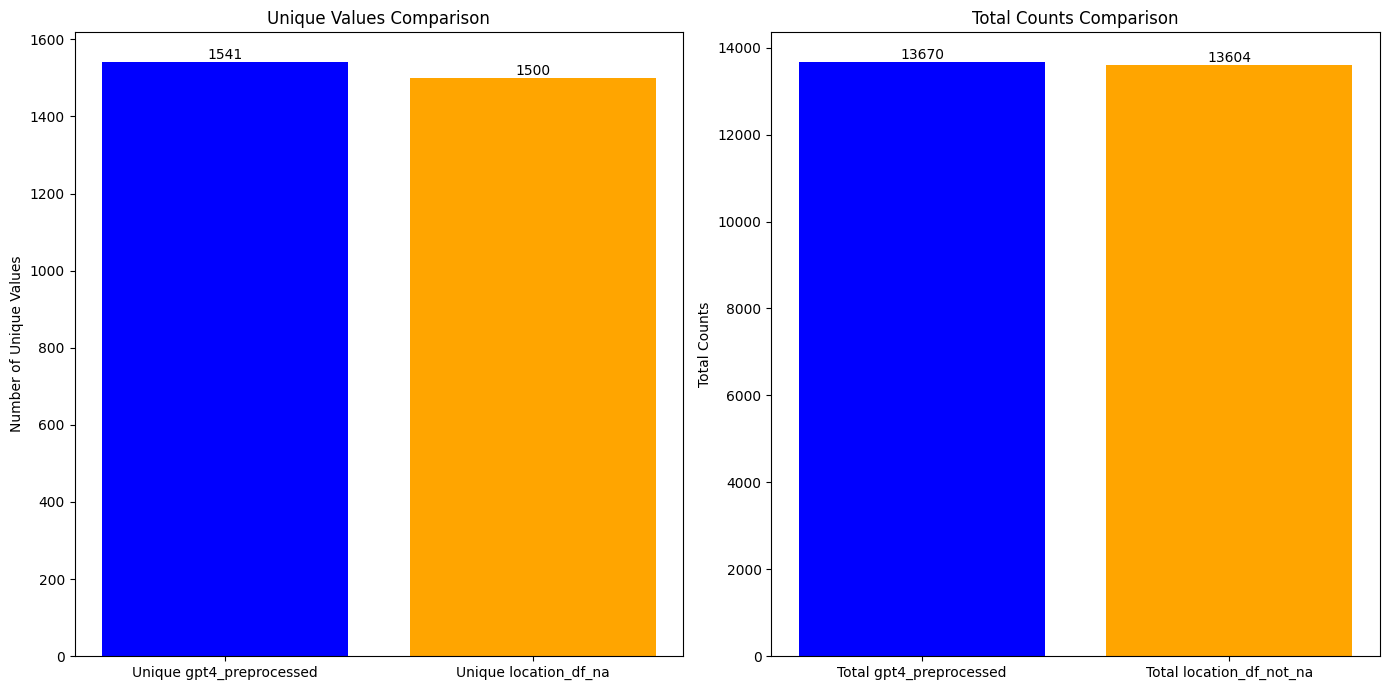

In [29]:
filtered_na = location_df[(location_df['gpt_result'] != '') & (location_df['location'].isna())]['gpt_result'].unique()
filtered_not_na = location_df[(location_df['gpt_result'] != '') & (location_df['location'].notna())]['gpt_result'].unique()


#사전 처리로 인해 원본에는 없던게 생긴 경우. 현재는 원본을 다루고 있으므로 이는 삭제해도 될 듯.
excldue_list = set(location_df['gpt_result'].unique()) - set(gpt4_preprocessed_df['location'].unique())
filtered_not_na  = set(filtered_not_na) - set(excldue_list)

# Unique values
unique_gpt4_preprocessed = gpt4_preprocessed_df['location'].unique()

# Calculate counts
unique_gpt4_preprocessed_count = len(unique_gpt4_preprocessed)
filtered_not_na_count = len(filtered_not_na)

# Filter gpt4_preprocessed_df based on filtered_not_na
filtered_not_na_in_gpt4 = gpt4_preprocessed_df[gpt4_preprocessed_df['location'].isin(filtered_not_na)]

total_filtered_not_na_count = filtered_not_na_in_gpt4['location'].value_counts().sum()

location_counts = gpt4_preprocessed_df['location'].value_counts()
total_gpt4_preprocessed_count = location_counts.drop(location_counts.index[0]).sum()


# Plotting
plt.figure(figsize=(14, 7))

# Plot 1: Unique values comparison
plt.subplot(1, 2, 1)
bars1 = plt.bar(['Unique gpt4_preprocessed', 'Unique location_df_na'], 
                [unique_gpt4_preprocessed_count, filtered_not_na_count], color=['blue', 'orange'])
plt.title('Unique Values Comparison')
plt.ylabel('Number of Unique Values')

# Add counts above the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

# Plot 2: Total counts comparison
plt.subplot(1, 2, 2)
bars2 = plt.bar(['Total gpt4_preprocessed', 'Total location_df_not_na'], 
                [total_gpt4_preprocessed_count, total_filtered_not_na_count], color=['blue', 'orange'])
plt.title('Total Counts Comparison')
plt.ylabel('Total Counts')

# Add counts above the bars
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [30]:
gpt4_result_df_copy = gpt4_preprocessed_df.copy()

# Update location values to '' where location is in filtered_na
filtered_na_set = set(filtered_na)
gpt4_result_df_copy.loc[gpt4_result_df_copy['location'].isin(filtered_na_set), 'location'] = ''

# display(gpt4_result_df_copy[(gpt4_result_df_copy['patient_id']=='p12185775') & (gpt4_result_df_copy['study_id']=='s59751598') & (gpt4_result_df_copy['sequence']==18)][['ent', 'location']])
# display(gpt4_preprocessed_df[gpt4_preprocessed_df['location']=='distal to the catheter tip'][['ent', 'location']])

In [31]:
loc_dict = dict(zip(location_df['gpt_result'], 
                    location_df[['location', 'detail1', 'detail2']].fillna('').values.tolist()))

need_to_double_check = pd.DataFrame(columns=gpt4_result_df_copy.columns)
check_list = []

def update_location(row):
    global need_to_double_check
    original_location = row['location'].strip()
    
    if original_location in loc_dict:
        loc, det1, det2 = loc_dict[original_location]
        
        loc = str(loc).strip()
        det1 = str(det1).strip()
        det2 = str(det2).strip()
                
        loc_parts = loc.split(',')
        
        if len(loc_parts) == 1:
            if loc == '' and det1 == '' and det2 == '':
                updated_location = ''
            elif loc != '' and det1 == '' and det2 == '':
                updated_location = f"loc1: {loc}"
            elif loc != '' and det1 != '' and det2 == '':
                updated_location = f"loc1: {loc}, det1: {det1}"
            elif loc != '' and det1 == '' and det2 != '':
                updated_location = f"loc1: {loc}, det2: {det2}"
            else:           
                updated_location = f"loc1: {loc}, det1: {det1}, det2: {det2}"
        else:
            loc_former, loc_latter = loc_parts[0].strip(), loc_parts[1].strip()
            updated_location = f"loc1: {loc_former}, det1: {det1}, loc2: {loc_latter}, det2: {det2}"

        return updated_location
    elif pd.notna(original_location) and original_location:
        need_to_double_check = pd.concat([need_to_double_check, pd.DataFrame([row])], ignore_index=True)
        check_list.append(original_location)
        
    return ''

gpt4_result_df_copy['location'] = gpt4_result_df_copy.apply(update_location, axis=1)

# Filter out rows where the location column is empty
display(gpt4_result_df_copy[gpt4_result_df_copy['location'] != ''][['ent', 'location']].head())

,ent,location
1,endotracheal tube,"loc1: clavicles, det1: upper margin"
8,nasogastric tube,loc1: stomach
11,adenopathy,loc1: left hilus
14,ap radiograph,loc1: chest
15,prominence,loc1: right paratracheal stripe


## attributes 확인

In [32]:
# Load the new CSV file
attributes_df = pd.read_csv('./attributes.csv')

# dist_ori_syn	dist_feedback	dist_exclude
# measure_ori_syn	measure_feedback	measure_exclude
attributes_df['technical limitation_ori_syn'] = attributes_df['technical limitation_ori_syn'].fillna('')
attributes_df['technical limitation_feedback'] = attributes_df['technical limitation_feedback'].fillna('')
attributes_df['technical limitation_exclude'] = attributes_df['technical limitation_exclude'].fillna('')

# Extract the unique sets for the columns morph_ori_syn and morph_feedback
morph_ori_set = set()
for sublist in attributes_df['technical limitation_ori_syn'].str.split(', ').tolist():
    for item in sublist:
        if ',' in item:
            morph_ori_set.update(item.split(','))
        else:
            morph_ori_set.add(item.strip())


morph_feedback_set = set()
for sublist in attributes_df['technical limitation_feedback'].str.split(', ').tolist():
    for item in sublist:
        if ',' in item:
            morph_feedback_set.update(item.split(','))
        else:
            morph_feedback_set.add(item.strip())


morph_exclude = set()
for sublist in attributes_df['technical limitation_exclude'].str.split(', ').tolist():
    for item in sublist:
        if ',' in item:
            morph_exclude.update(item.split(','))
        else:
            morph_exclude.add(item.strip())

# print(len(morph_ori_set), len(morph_feedback_set), len(morph_exclude))


# Calculate the differences between the two sets
# 원본에서 버려지는 내용
morph_ori_syn_minus_feedback = morph_ori_set - morph_feedback_set
morph_feedback_minus_ori_syn = morph_feedback_set - morph_ori_set
leftover = morph_ori_syn_minus_feedback - morph_exclude

print(len(morph_ori_syn_minus_feedback), len(morph_feedback_minus_ori_syn), len(leftover))

print("ori 삭제하고도 남은 0이 되어야함:", leftover)
print("ori 삭제:", morph_ori_syn_minus_feedback)
print("생로 생김:", morph_feedback_minus_ori_syn)
print("morph_exclude", morph_exclude)

as_terms_in_ori = [term for term in morph_ori_set if term.startswith('most recently')]
as_terms_in_feedback = [term for term in morph_feedback_set if term.startswith('most recently')]
as_terms_in_ori, as_terms_in_feedback


94 9 0
ori 삭제하고도 남은 0이 되어야함: set()
ori 삭제: {'related to technique', 'oblique views would be necessary', 'dedicated pa and lateral suggested', 'a view of the upper abdomen must be obtained using abdominal technique', 'not available for comparison', 'no prior chest radiographs available for review', 'lateral view is mandatory', 'portable chest examination', 'for further evaluation', 'lordotic positioning', 'repeat fully upright', 'standard placement', 'repeat film taken before use', 'lateral view could be obtained', 'ap upright chest film', 'supine exam', 'better assessment', 'should be withdrawn for standard positioning', 'left lateral views', 'study does not include a dedicated rib series', 'decubitus films', 'distal tip cannot be traced further due to the overlying structures', 'dedicated shoulder films can further characterize', 'compared to the prior radiograph', 'ap frontal and left lateral view', 'ap technique', 'fluoroscopic control', 'limits evaluation of the cardiac and mediast

([], [])

## 1) 원본 df에 Attributes 반영

In [33]:
def rename_comparison_column(df):
    return df.rename(columns={'comparision': 'comparison'})

def filter_exclude_exact(column, exclude_values):
    exclude_set = set(value.strip().lower() for exclude in exclude_values if pd.notna(exclude)
                      for value in str(exclude).split(','))
    
    def filter_value(value):
        if pd.isna(value):
            return None
        original_values = [v.strip().lower() for v in str(value).split(',')]
        filtered_values = [v for v in original_values if v not in exclude_set]
        result = ', '.join(filtered_values) if filtered_values else None
        return result
    
    return column.apply(filter_value)

def filter_exclude_partial(column, exclude_values):
    exclude_words = set(word.strip().lower() 
                        for exclude in exclude_values if pd.notna(exclude)
                        for value in str(exclude).split(',')
                        for word in value.split())
    
    def filter_value(value):
        if pd.isna(value):
            return None
        original_values = str(value).split(',')
        filtered_values = []
        for v in original_values:
            words = v.strip().lower().split()
            filtered_words = [word for word in words if word not in exclude_words]
            if filtered_words:
                filtered_values.append(' '.join(filtered_words))
        result = ', '.join(filtered_values) if filtered_values else None
        return result
    
    return column.apply(filter_value)

def apply_filters(df, attributes_df, fields):
    partial_fields = ['morphology', 'distribution']
    for field in fields:
        if field in ['size', 'num'] and 'measure_exclude' in attributes_df.columns:
            before_count = df[field].nunique()
            # print(f"\nField: {field}")
            # print(f"Before filtering: {before_count} unique values")
            # print("Sample before:", df[field].dropna().unique()[:5].tolist())
            
            df[field] = filter_exclude_exact(df[field], attributes_df['measure_exclude'])
            after_exact_count = df[field].nunique()
            # print(f"After exact filtering: {after_exact_count} unique values")
            # print("Sample after exact:", df[field].dropna().unique()[:5].tolist())
        elif f'{field}_exclude' in attributes_df.columns:
            before_count = df[field].nunique()
            # print(f"\nField: {field}")
            # print(f"Before filtering: {before_count} unique values")
            # print("Sample before:", df[field].dropna().unique()[:5].tolist())
            
            df[field] = filter_exclude_exact(df[field], attributes_df[f'{field}_exclude'])
            after_exact_count = df[field].nunique()
            # print(f"After exact filtering: {after_exact_count} unique values")
            # print("Sample after exact:", df[field].dropna().unique()[:5].tolist())
            
            if field in partial_fields:
                df[field] = filter_exclude_partial(df[field], attributes_df[f'{field}_exclude'])
                after_partial_count = df[field].nunique()
                # print(f"After partial filtering: {after_partial_count} unique values")
                # print("Sample after partial:", df[field].dropna().unique()[:5].tolist())
    return df

def plot_before_after_unique(original_df, filtered_df, fields):
    before_counts = []
    after_counts = []
    for field in fields:
        before_counts.append(original_df[field].nunique())
        after_counts.append(filtered_df[field].nunique())

    fig, ax = plt.subplots(figsize=(15, 8))
    bar_width = 0.35
    index = range(len(fields))

    plt.bar(index, before_counts, bar_width, label='Before Filtering', color='b', alpha=0.7)
    plt.bar([i + bar_width for i in index], after_counts, bar_width, label='After Filtering', color='r', alpha=0.7)

    plt.xlabel('Fields')
    plt.ylabel('Number of Unique Values')
    plt.title('Unique Values Before and After Filtering')
    plt.xticks([i + bar_width/2 for i in index], fields, rotation=45, ha='right')
    plt.legend()

    for i, v in enumerate(before_counts):
        plt.text(i, v, str(v), ha='center', va='bottom')
    for i, v in enumerate(after_counts):
        plt.text(i + bar_width, v, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
    
def plot_before_after(original_df, filtered_df, fields):
    before_counts = []
    after_counts = []
    for field in fields:
        before_counts.append(original_df[field].dropna().count())
        after_counts.append(filtered_df[field].dropna().count())

    fig, ax = plt.subplots(figsize=(15, 8))
    bar_width = 0.35
    index = range(len(fields))

    plt.bar(index, before_counts, bar_width, label='Before Filtering', color='b', alpha=0.7)
    plt.bar([i + bar_width for i in index], after_counts, bar_width, label='After Filtering', color='r', alpha=0.7)

    plt.xlabel('Fields')
    plt.ylabel('Number of Non-NaN Values')
    plt.title('Non-NaN Values Before and After Filtering')
    plt.xticks([i + bar_width/2 for i in index], fields, rotation=45, ha='right')
    plt.legend()

    for i, v in enumerate(before_counts):
        plt.text(i, v, str(v), ha='center', va='bottom')
    for i, v in enumerate(after_counts):
        plt.text(i + bar_width, v, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # 각 필드별 nan이 아닌 값의 개수 차이 출력
    print("\nDifference in non-NaN values (Before - After):")
    for field, before, after in zip(fields, before_counts, after_counts):
        diff = before - after
        print(f"{field}: {diff}")

fields = ['morphology', 'distribution', 'size', 'num', 'severity', 'comparison', 'emerge', 'no change', 'improved', 'worsened', 'reposition', 'resolve', 'technical limitation', 'other source']

original_df = rename_comparison_column(gpt4_result_df_copy.copy(deep=True))
filtered_df = rename_comparison_column(gpt4_result_df_copy.copy(deep=True))

filtered_df = apply_filters(filtered_df, attributes_df, fields)
filtered_df.columns

Index(['Unnamed: 0', 'patient_id', 'study_id', 'sequence', 'sec', 'report',
       'sent', 'ent', 'cat', 'status', 'location', 'evidence', 'morphology',
       'distribution', 'size', 'num', 'severity', 'comparison', 'emerge',
       'no change', 'improved', 'worsened', 'reposition', 'resolve', 'past hx',
       'other source', 'technical limitation', 'misc', 'idx'],
      dtype='object')

## Improved + Resolve, Size + Num category 해도될지 확인

improved와 resolve 컬럼 모두에 값이 있는 행의 수: 3
전체 행 대비 비율: 0.01%

해당 행들:


,ent,patient_id,study_id,sent,improved,resolve
23481,pulmonary edema,p17838301,s56581318,"Rapid improvement in pulmonary edema, which is nearly resolved.",rapid improvement,nearly resolved
26822,opacity,p13263843,s57474634,"There is a persistent patchy left basilar opacity, but with general improvement in aeration of the left lower lobe and resolution of a small left-sided pleural effusion.",general improvement,resolution
37973,densities,p16826047,s52520063,"Comparison with the next previous study suggests that the right-sided massive pleural densities have changed in position slightly and as much, there is improved aeration of the right upper lobe area and the previously identified large pleural density in the right axillary area impressing on the aerated lung tissue has clearly decreased.",improved aeration,decreased


improved와 resolve 컬럼 모두에 값이 있는 행의 수: 6
전체 행 대비 비율: 0.02%

해당 행들:


,ent,patient_id,study_id,sent,size,num
613,nodules,p10402372,s57949791,but there are several small nodules and bronchiectasis in the right lower lobe.,small,several
4888,opacities,p11569093,s59413372,There again appear to be some small opacities within the partially collapsed right lung.,small,some
8892,nodule,p16855430,s50718199,"A small nodule in the left mid lung zone is stable measuring 4 mm and likely due to prior granulomatous disease, as also seen on chest CT.",small,single
16968,nodules,p12702423,s59289980,"Multiple small nodules are seen bilaterally, consistent with the patients known history of metastatic renal cell carcinoma.",small,multiple
16996,nodules,p12702423,s54932317,Extensive intrathoracic malignancy includes scores of nodules of various sizes in the right lung which may have grown more numerous and enlarged over just a two-day interval.,various sizes,scores
17134,nodule,p14295224,s53458437,6 mm right lower lobe nodule is unchanged since.,6 mm,single



Final results for field: morphology
Before filtering: 248 unique values
After filtering: 201 unique values
Sample before: ['looped', 'osteophytic spurring', 'appearance', 'streaky', 'rightward convex']
Sample after: ['looped', 'streaky', 'crescentic', 'coiled', 'curved']
뺀거: ['osteophytic spurring', 'double contour', 'focal', 'appearance', 'rightward convex', 'cephalization', 'subsegmental', 'configuration', 'plaques', 'overall', 'linear structures', 'relative', 'anterior wedge', 'left ventricular configuration', 'minor', 'circular metallic ring', 'partly loculated', 'generalized', 'multiple', 'local', 'peripheral', 'vertically oriented', 'scattered', 'midline', 'linearly oriented', 'rightward deviation', 'small linear', 'diffusely sclerotic', 'small caliber', 'anterior', 'tapered configuration', 'central', 'rightward', 'constant', 'segmental', 'multilevel', 'consistent with neoesophagus', 'diffuse', 'horizontally oriented', 'calcification', 'double lumen', 'correct position', 'centra

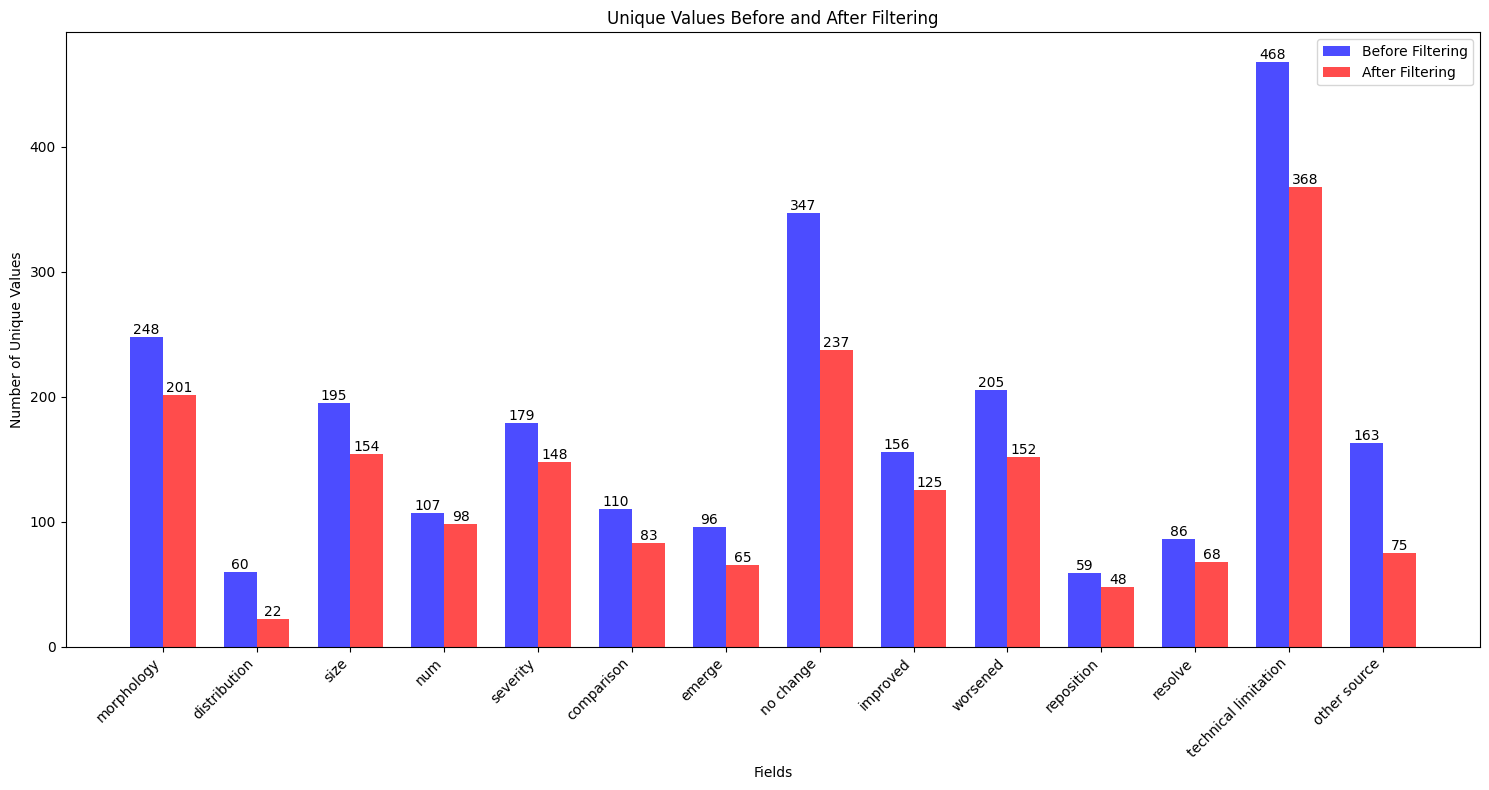

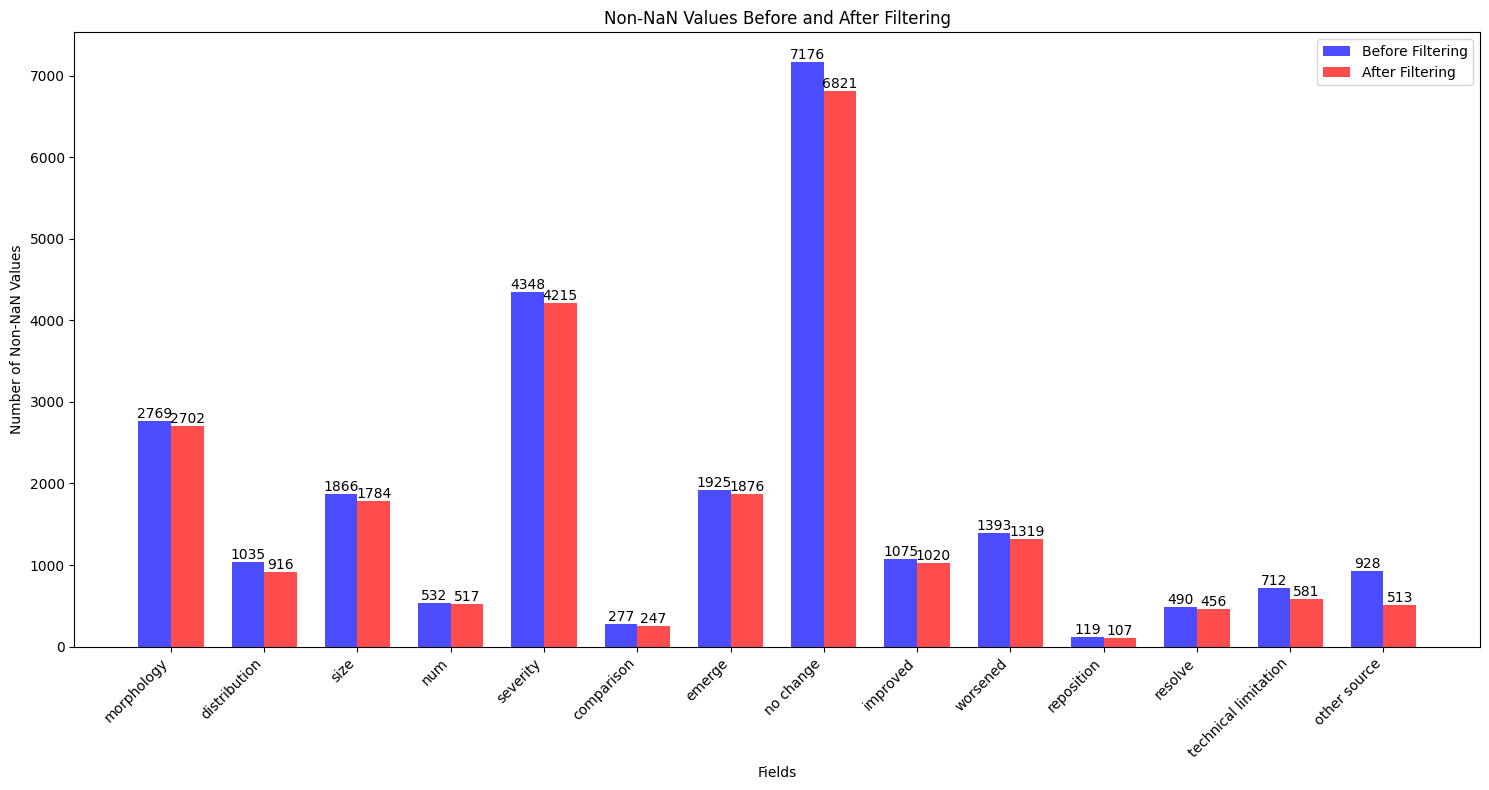


Difference in non-NaN values (Before - After):
morphology: 67
distribution: 119
size: 82
num: 15
severity: 133
comparison: 30
emerge: 49
no change: 355
improved: 55
worsened: 74
reposition: 12
resolve: 34
technical limitation: 131
other source: 415


In [34]:
pd.set_option('display.max_colwidth', None)
both_columns_filled = filtered_df[(filtered_df['improved'].notna()) & (filtered_df['resolve'].notna())]

# 결과 출력
print(f"improved와 resolve 컬럼 모두에 값이 있는 행의 수: {len(both_columns_filled)}")
print(f"전체 행 대비 비율: {len(both_columns_filled) / len(filtered_df) * 100:.2f}%")

# 옵션: 해당 행들을 확인하고 싶다면
print("\n해당 행들:")
display(both_columns_filled[['ent', 'patient_id', 'study_id', 'sent', 'improved', 'resolve']])

##############################################################################################################################

pd.set_option('display.max_colwidth', None)
both_columns_filled = filtered_df[(filtered_df['size'].notna()) & (filtered_df['num'].notna())]

# 결과 출력
print(f"improved와 resolve 컬럼 모두에 값이 있는 행의 수: {len(both_columns_filled)}")
print(f"전체 행 대비 비율: {len(both_columns_filled) / len(filtered_df) * 100:.2f}%")

# 옵션: 해당 행들을 확인하고 싶다면
print("\n해당 행들:")
display(both_columns_filled[['ent', 'patient_id', 'study_id', 'sent', 'size', 'num']])

##############################################################################################################################


fields = ['morphology', 'distribution', 'size', 'num', 'severity', 'comparison', 'emerge', 'no change', 'improved', 'worsened', 'reposition', 'resolve', 'technical limitation', 'other source']
# 필터링 결과 출력
for field in fields:
    print(f"\nFinal results for field: {field}")
    before_unique = set(original_df[field].dropna().unique())
    after_unique = set(filtered_df[field].dropna().unique())
    
    print(f"Before filtering: {len(before_unique)} unique values")
    print(f"After filtering: {len(after_unique)} unique values")
    print("Sample before:", list(before_unique)[:5])
    print("Sample after:", list(after_unique)[:5])
    print("뺀거:", list(before_unique - after_unique))  # 차집합 연산
    print(f"Number of removed values: {len(before_unique - after_unique)}")

plot_before_after_unique(original_df, filtered_df, fields)
plot_before_after(original_df, filtered_df, fields)

## Improved + Resolve, Size + Num category 각각 통합

In [35]:
# 원본 데이터프레임 복사
gpt4_result_df_before = filtered_df.copy()

# Before 상태 출력
print("Before:")
display(gpt4_result_df_before[['improved', 'resolve']].dropna(how='all').head())
display(gpt4_result_df_before[['size', 'num']].dropna(how='all').head())
print("\n")

# improved 컬럼 업데이트
filtered_df['improved'] = filtered_df.apply(
    lambda row: row['resolve'] if pd.isna(row['improved']) else
    (row['improved'] if pd.isna(row['resolve']) else
     f"{row['improved']} and {row['resolve']}"),
    axis=1
)

original_df['improved'] = original_df.apply(
    lambda row: row['resolve'] if pd.isna(row['improved']) else
    (row['improved'] if pd.isna(row['resolve']) else
     f"{row['improved']} and {row['resolve']}"),
    axis=1
)

# measure 컬럼 업데이트
filtered_df['measure'] = filtered_df.apply(
    lambda row: row['size'] if pd.isna(row['num']) else
    (str(row['num']) if pd.isna(row['size']) else
     f"{row['num']} {row['size']}"),
    axis=1
)

original_df['measure'] = original_df.apply(
    lambda row: row['size'] if pd.isna(row['num']) else
    (str(row['num']) if pd.isna(row['size']) else
     f"{row['num']} {row['size']}"),
    axis=1
)

# 앞뒤 공백 제거
filtered_df['improved'] = filtered_df['improved'].apply(lambda x: x.strip() if isinstance(x, str) else x)
filtered_df['measure'] = filtered_df['measure'].apply(lambda x: x.strip() if isinstance(x, str) else x)
original_df['improved'] = original_df['improved'].apply(lambda x: x.strip() if isinstance(x, str) else x)
original_df['measure'] = original_df['measure'].apply(lambda x: x.strip() if isinstance(x, str) else x)

# resolve 컬럼 삭제
filtered_df = filtered_df.drop('resolve', axis=1)
filtered_df = filtered_df.drop('size', axis=1)
filtered_df = filtered_df.drop('num', axis=1)

# After 상태 출력
print("After:")
display(filtered_df[['improved']].dropna().head(10))
display(filtered_df[['measure']].dropna().head(10))
print(f"\nTotal non-empty rows: {len(filtered_df[['improved']].dropna())}")
print("\n")

Before:


,improved,resolve
121,None,removed
135,markedly improved,None
163,improved,None
167,decreased,None
195,improved,None


,size,num
23,low,None
29,enlarged,None
37,normal,None
64,low,None
66,12-cm,None




After:


,improved
121,removed
135,markedly improved
163,improved
167,decreased
195,improved
196,improved
197,minimally improved
223,improved
245,improved
302,removal


,measure
23,low
29,enlarged
37,normal
64,low
66,12-cm
94,large
110,35 cm
119,borderline
230,65 cm
266,35 cm



Total non-empty rows: 1473




## Past hx 살리기. (emerge, no change에서 know, status post, post operative 등의 내용도 옮겨줌)

In [36]:
past_hx_pattern = r'\b(known|pre-existing|past hx|postop|postoperative|history|pre-op|longstanding|multiple prior|three months ago|six days ago|past 24 hr|3 days ago|past two days|2 days ago|status post|secondary to|diagnosed|clinical history|treated for|baseline|background|medical history|post|s/p)\b'

def find_past_hx(text):
    if pd.isna(text):
        return []
    words = re.findall(r'\S+', text)
    matches = []
    for word in words:
        if re.search(past_hx_pattern, word, re.IGNORECASE):
            matches.append(word)
    return matches

# 1. filtered_df['past hx']에서 past_hx_pattern에 관련없는 내용 삭제
filtered_df['past hx'] = filtered_df['past hx'].apply(lambda x: ', '.join(find_past_hx(x)))

# 2. 'emerge'와 'no change' 컬럼에서 past_hx_pattern에 등장하는 표현들을 'past hx'로 옮기기
def move_past_hx(row):
    past_hx_values = find_past_hx(row['past hx'])
    
    for field in ['emerge', 'no change']:
        matches = find_past_hx(row[field])
        if matches:
            past_hx_values.extend(matches)
            # 원래 필드에서 해당 표현 제거
            for match in matches:
                row[field] = re.sub(r'\b' + re.escape(match) + r'\b', '', row[field], flags=re.IGNORECASE)
            row[field] = ' '.join(row[field].split())  # 여러 개의 공백을 하나로 줄임
    
    return pd.Series({
        'past hx': ', '.join(sorted(set(past_hx_values))),
        'emerge': row['emerge'],
        'no change': row['no change']
    })

# 데이터프레임에 변경사항 적용
filtered_df[['past hx', 'emerge', 'no change']] = filtered_df.apply(move_past_hx, axis=1)


Final results for field: morphology
Before filtering: 248 unique values
After filtering: 201 unique values
Sample before: ['stable', 'dense', 'not dilated', 'central rounded lucency', 'linear structures']
Sample after: ['stable', 'dense', 'not dilated', 'nondisplaced', 'linear lucency']
뺀거: ['linearly oriented', 'central rounded lucency', 'linear structures', 'left ventricular configuration', 'nodule', 'diffuse', 'central', 'gentle', 'residual', 'peripheral', 'posteriorly layering', 'minor', 'poor definition', 'peribronchial', 'constant', 'oval-shaped ring formation', 'anterior wedge', 'midline', 'central lucency', 'relative', 'double contour', 'rightward convex', 'appearance', 'anterior', 'osteophytic spurring', 'diffusely sclerotic', 'calcification', 'double lumen', 'correct position', 'subsegmental', 'partly loculated', 'cephalization', 'segmental', 'tapered configuration', 'sharp lower margin', 'extensive', 'rightward', 'generalized', 'retrocardiac', 'scattered', 'plaques', 'local

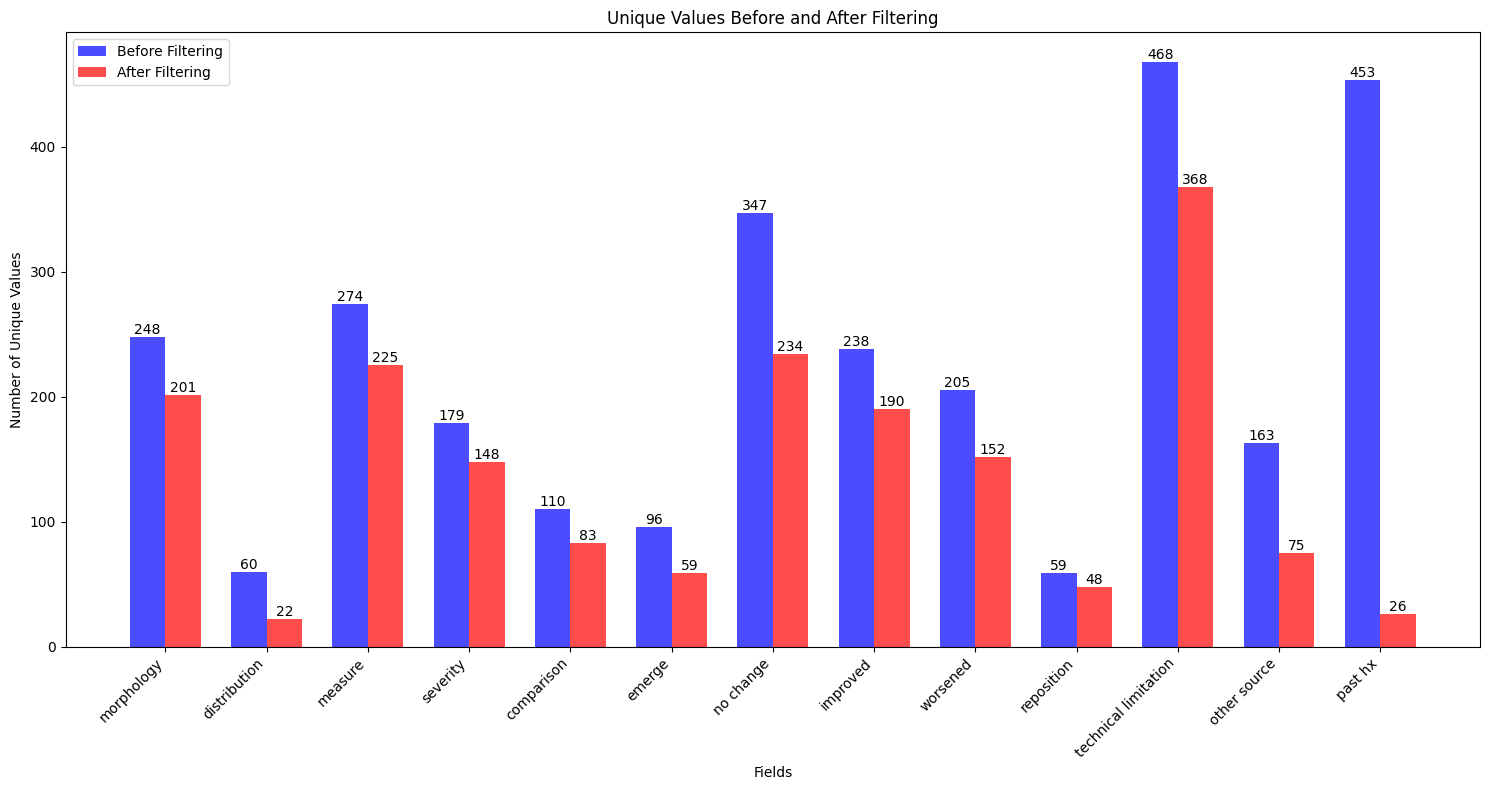

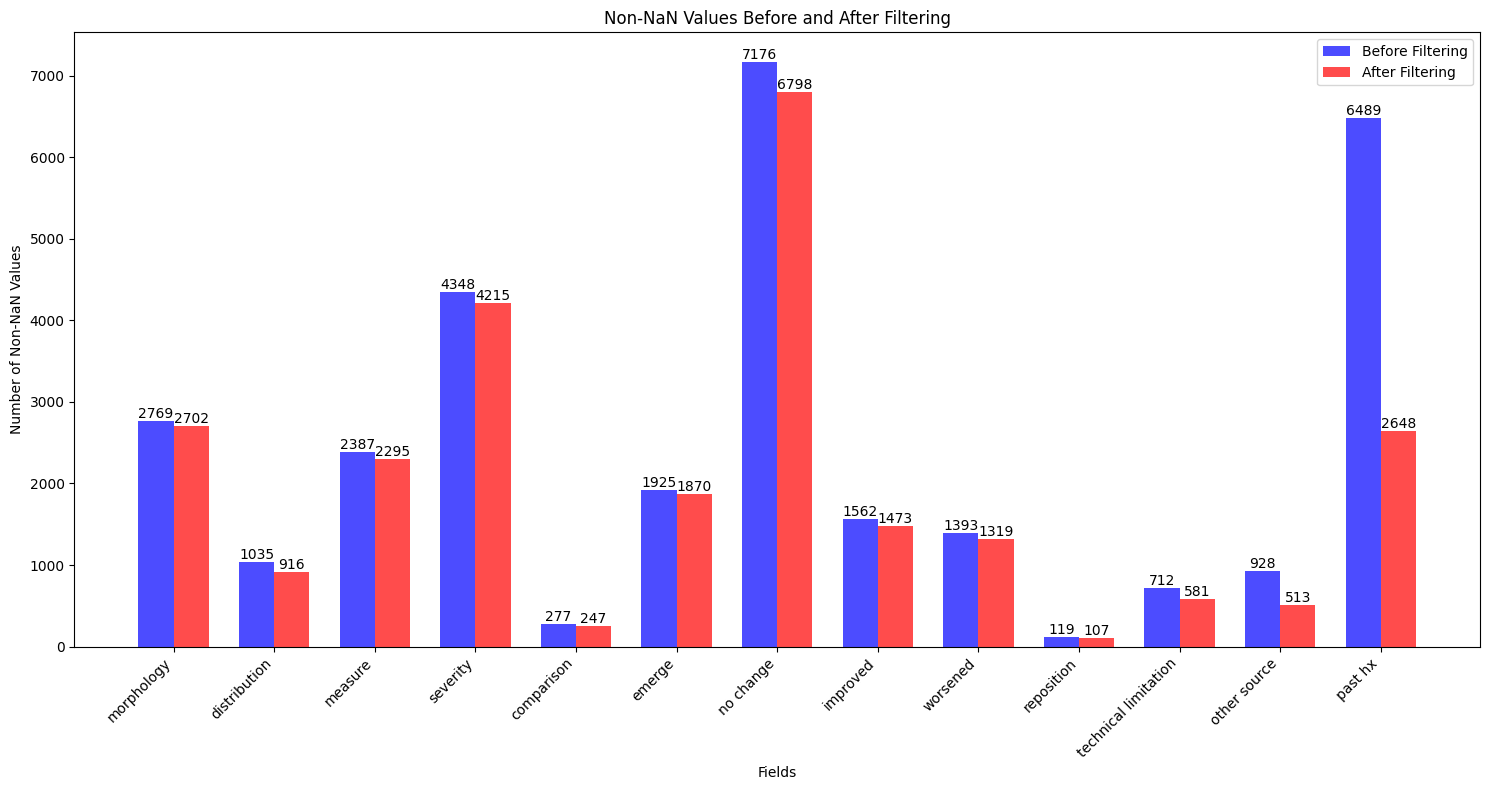


Difference in non-NaN values (Before - After):
morphology: 67
distribution: 119
measure: 92
severity: 133
comparison: 30
emerge: 55
no change: 378
improved: 89
worsened: 74
reposition: 12
technical limitation: 131
other source: 415
past hx: 3841


In [22]:
import numpy as np
filtered_df.replace('', np.nan, inplace=True)

fields = ['morphology', 'distribution', 'measure', 'severity', 'comparison', 'emerge', 'no change', 'improved', 'worsened', 'reposition', 'technical limitation', 'other source', 'past hx']
# 필터링 결과 출력
for field in fields:
    print(f"\nFinal results for field: {field}")
    before_unique = set(original_df[field].dropna().unique())
    after_unique = set(filtered_df[field].dropna().unique())
    
    print(f"Before filtering: {len(before_unique)} unique values")
    print(f"After filtering: {len(after_unique)} unique values")
    print("Sample before:", list(before_unique)[:5])
    print("Sample after:", list(after_unique)[:5])
    print("뺀거:", list(before_unique - after_unique))  # 차집합 연산
    print(f"Number of removed values: {len(before_unique - after_unique)}")

plot_before_after_unique(original_df, filtered_df, fields)
plot_before_after(original_df, filtered_df, fields)

## 값들이 제대로 반영되었는지. 값 체크. 

In [37]:
# 관심 있는 열들을 리스트로 정의
columns_of_interest = ['ent', 'location', 'severity', 'no change', 'improved', 'worsened', 'reposition']

# 해당 열들 중 하나라도 NA가 아닌 행들을 선택
non_na_rows = filtered_df[filtered_df[columns_of_interest].notna().any(axis=1)]

# 결과 출력
print(f"Total rows in filtered_df: {len(filtered_df)}")
print(f"Rows with non-NA values in columns of interest: {len(non_na_rows)}")

# 선택된 열들의 샘플 데이터 출력
print("\nSample data:")
print(non_na_rows[columns_of_interest].head(100).to_string())

# 각 열별로 NA가 아닌 값의 개수와 고유한 값들 출력
for col in columns_of_interest:
    non_na_count = non_na_rows[col].notna().sum()
    unique_values = non_na_rows[col].dropna().unique()
    print(f"\n{col}:")
    print(f"  Non-NA count: {non_na_count}")
    print(f"  Unique values: {unique_values[:5]}  {'...' if len(unique_values) > 5 else ''}")

Total rows in filtered_df: 38805
Rows with non-NA values in columns of interest: 38805

Sample data:
                                   ent                                    location     severity  no change improved worsened reposition
0                            intubated                                                     None       None     None     None       None
1                    endotracheal tube         loc1: clavicles, det1: upper margin         None       None     None     None       None
2                                lungs                                                     None       None     None     None       None
3        cardiomediastinal silhouettes                                                     None       None     None     None       None
4                          silhouettes                                                     None       None     None     None       None
5                     pleural surfaces                                             

In [38]:
display(raw_gpt4[['ent', 'cat','location', 'severity', 'no change', 'improved', 'worsened', 'reposition']].head(10))
display(filtered_df[['ent', 'cat','location', 'severity', 'no change', 'improved', 'worsened', 'reposition']].head(10))

,ent,cat,location,severity,no change,improved,worsened,reposition
0,intubated,OTH,,NaN,NaN,NaN,NaN,NaN
1,endotracheal tube,OTH,upper margin of the clavicles,NaN,NaN,NaN,NaN,NaN
2,lungs,ROF,,NaN,NaN,NaN,NaN,NaN
3,cardiomediastinal silhouettes,ROF,,NaN,NaN,NaN,NaN,NaN
4,hilar silhouettes,ROF,,NaN,NaN,NaN,NaN,NaN
5,pleural surfaces,ROF,,NaN,NaN,NaN,NaN,NaN
6,et tube,OTH,,NaN,NaN,NaN,NaN,NaN
7,et tube,OTH,,NaN,NaN,NaN,NaN,NaN
8,nasogastric tube,OTH,stomach,NaN,NaN,NaN,NaN,NaN
9,lungs,ROF,,NaN,NaN,NaN,NaN,NaN


,ent,cat,location,severity,no change,improved,worsened,reposition
0,intubated,SYM,,None,None,None,None,None
1,endotracheal tube,OTH,"loc1: clavicles, det1: upper margin",None,None,None,None,None
2,lungs,LF,,None,None,None,None,None
3,cardiomediastinal silhouettes,LF,,None,None,None,None,None
4,silhouettes,LF,,None,None,None,None,None
5,pleural surfaces,LF,,None,None,None,None,None
6,et tube,OTH,,None,None,None,None,None
7,et tube,OTH,,None,None,None,None,None
8,nasogastric tube,OTH,loc1: stomach,None,None,None,None,None
9,lungs,LF,,None,None,None,None,None


In [25]:
# filtered_df[filtered_df['cat'].isna()][['ent', 'cat']].drop_duplicates().to_csv('filtered_df_cat_na.csv', index=False)

In [39]:
def contains_uppercase(s):
    return bool(re.search(r'[A-Z]', s))

# Apply the function to the 'ent' column and filter the dataframe
filtered_df['ent'] = filtered_df['ent'].astype(str)

# Function to check if a string contains any uppercase letters
def contains_uppercase(s):
    return bool(re.search(r'[A-Z]', s))

# Apply the function to the 'ent' column and filter the dataframe
uppercase_entries = filtered_df[filtered_df['ent'].apply(contains_uppercase)]

# Display unique entries with uppercase letters
uppercase_entries_unique = uppercase_entries['ent'].unique()

uppercase_entries_unique


array([], dtype=object)

## Metadata file에 뷰정보가 있는 것만.

In [41]:
metadata_df = pd.read_csv('./mimic-cxr-2.0.0-metadata.csv')
# metadata_df.head(100).to_csv('sub_meta.csv')
metadata_df['study_id'] = 's' + metadata_df['study_id'].astype(str)

def unique_list(x):
    unique_values = list(set(x))
    return unique_values if len(unique_values) > 1 else unique_values[0]

# study_id를 기준으로 그룹화하고 다른 열들은 유니크한 값만 남기기
aggregated_metadata = metadata_df.groupby('study_id').agg(unique_list)

# 결과 확인
print(aggregated_metadata.head())
print(aggregated_metadata.shape)

# 리스트 형태로 저장된 열 확인
for column in aggregated_metadata.columns:
    if aggregated_metadata[column].apply(type).eq(list).any():
        print(f"\n{column} 열에 리스트가 포함되어 있습니다.")
        print(aggregated_metadata[aggregated_metadata[column].apply(type).eq(list)][column].head())

# 통합된 metadata_df를 이용해 merge 수행
merge_df = filtered_df.merge(
    aggregated_metadata.reset_index(),
    on='study_id',
    how='left'
)

print("\n병합 후 merge_df의 shape:", merge_df.shape)


                                                                                               dicom_id  \
study_id                                                                                                  
s50000014                                                  dffc8ab2-ff37704f-2fb29e6d-51e08075-88bca914   
s50000028  [1ff9650f-4cb5af18-f6caef33-e53686b7-983cca76, 33708b7f-979612cb-46e1424c-318354bc-6f043189]   
s50000052                                                  a09e5a6c-9635efa7-de26c04a-28104ce9-e5f798d6   
s50000103  [2494a682-83c9ec78-4727272f-25733f42-58d9f47c, df49acf6-7e2f0ce1-f5cfea84-3562fab5-ef3af4a0]   
s50000125                                                  dfa001f0-9c3d0a8c-b61096ea-e3b90c21-6228ddff   

           subject_id PerformedProcedureStepDescription   ViewPosition  \
study_id                                                                 
s50000014    11941242               CHEST (PORTABLE AP)             AP   
s50000028    19995127       

In [42]:
merge_df.to_csv('final_df.csv', index=False)

In [44]:
non_nan_rows = merge_df[
    merge_df['ViewPosition'].notna() & 
    merge_df['ViewCodeSequence_CodeMeaning'].notna() & 
    merge_df['PatientOrientationCodeSequence_CodeMeaning'].notna()
]
non_nan_rows['study_id'].nunique()

2795

In [45]:
non_nan_rows.head()

,Unnamed: 0,patient_id,study_id,sequence,sec,report,sent,ent,cat,status,...,subject_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
12,12,p10046166,s56173345,1,HIST,Evaluation of the patient with intracranial hemorrhage with chest heaviness.,Evaluation of the patient with intracranial hemorrhage with chest heaviness.,intracranial hemorrhage,NCD,DP|Evaluation of the patient,...,10046166,CHEST (PORTABLE AP),AP,2544,3056,21321207,192425.703,CHEST (PORTABLE AP),antero-posterior,Erect
13,13,p10046166,s56173345,1,HIST,Evaluation of the patient with intracranial hemorrhage with chest heaviness.,Evaluation of the patient with intracranial hemorrhage with chest heaviness.,chest heaviness,SYM,DP|with,...,10046166,CHEST (PORTABLE AP),AP,2544,3056,21321207,192425.703,CHEST (PORTABLE AP),antero-posterior,Erect
14,14,p10046166,s56173345,1,FIND,AP radiograph of the chest was reviewed in comparison to CT torso from the same day obtained earlier. There is prominence of the right paratracheal stripe consistent with known enlarged lymph node. Heart size and mediastinum are otherwise unchanged in the short interim. Calcified granuloma in the right lower lobe is redemonstrated. No new abnormalities within the lungs seen.,AP radiograph of the chest was reviewed in comparison to CT torso from the same day obtained earlier.,ap radiograph,NaN,DP|was reviewed,...,10046166,CHEST (PORTABLE AP),AP,2544,3056,21321207,192425.703,CHEST (PORTABLE AP),antero-posterior,Erect
15,15,p10046166,s56173345,1,FIND,AP radiograph of the chest was reviewed in comparison to CT torso from the same day obtained earlier. There is prominence of the right paratracheal stripe consistent with known enlarged lymph node. Heart size and mediastinum are otherwise unchanged in the short interim. Calcified granuloma in the right lower lobe is redemonstrated. No new abnormalities within the lungs seen.,There is prominence of the right paratracheal stripe consistent with known enlarged lymph node.,prominence,LF,DP|There is,...,10046166,CHEST (PORTABLE AP),AP,2544,3056,21321207,192425.703,CHEST (PORTABLE AP),antero-posterior,Erect
16,16,p10046166,s56173345,1,FIND,AP radiograph of the chest was reviewed in comparison to CT torso from the same day obtained earlier. There is prominence of the right paratracheal stripe consistent with known enlarged lymph node. Heart size and mediastinum are otherwise unchanged in the short interim. Calcified granuloma in the right lower lobe is redemonstrated. No new abnormalities within the lungs seen.,There is prominence of the right paratracheal stripe consistent with known enlarged lymph node.,lymph node,LF,DP|consistent with,...,10046166,CHEST (PORTABLE AP),AP,2544,3056,21321207,192425.703,CHEST (PORTABLE AP),antero-posterior,Erect


In [46]:
print(non_nan_rows.drop_duplicates('study_id')['ViewPosition'].value_counts(dropna=False)), print(non_nan_rows.drop_duplicates('study_id')['ViewCodeSequence_CodeMeaning'].value_counts(dropna=False)), print(non_nan_rows.drop_duplicates('study_id')['PatientOrientationCodeSequence_CodeMeaning'].value_counts(dropna=False))

ViewPosition
AP                   1540
[LATERAL, PA]         446
[LL, PA]              421
[LATERAL, AP]         305
[nan, LL]              27
[LL, nan]              20
[LL, AP]               17
PA                      9
LATERAL                 2
[LATERAL, AP, PA]       2
[LL, nan, AP]           1
[AP, PA]                1
[LL, AP, PA]            1
[LL, nan, PA]           1
LL                      1
[LATERAL, AP, LL]       1
Name: count, dtype: int64
ViewCodeSequence_CodeMeaning
antero-posterior                                      1540
[lateral, postero-anterior]                            446
[left lateral, postero-anterior]                       421
[antero-posterior, lateral]                            305
[nan, left lateral]                                     27
[left lateral, nan]                                     20
[left lateral, antero-posterior]                        17
postero-anterior                                         9
lateral                                     

(None, None, None)

In [47]:
metadata_df.columns, filtered_df.columns

(Index(['dicom_id', 'subject_id', 'study_id',
        'PerformedProcedureStepDescription', 'ViewPosition', 'Rows', 'Columns',
        'StudyDate', 'StudyTime', 'ProcedureCodeSequence_CodeMeaning',
        'ViewCodeSequence_CodeMeaning',
        'PatientOrientationCodeSequence_CodeMeaning'],
       dtype='object'),
 Index(['Unnamed: 0', 'patient_id', 'study_id', 'sequence', 'sec', 'report',
        'sent', 'ent', 'cat', 'status', 'location', 'evidence', 'morphology',
        'distribution', 'severity', 'comparison', 'emerge', 'no change',
        'improved', 'worsened', 'reposition', 'past hx', 'other source',
        'technical limitation', 'misc', 'idx', 'measure'],
       dtype='object'))

# 전체에서 환자-level로 샘플링 진행해서 annotation 맡기기

In [48]:
sequences_per_patient = non_nan_rows.groupby('patient_id')['sequence'].max()

patients_with_2_to_20_sequences = sequences_per_patient[(sequences_per_patient >= 1) & (sequences_per_patient < 16)].index

_2to_10_sequences_df = non_nan_rows[non_nan_rows['patient_id'].isin(patients_with_2_to_20_sequences)]
_2to_10_sequences_df.study_id.nunique()

1228

# 기준 1. category별 normalized entity - status에 따라 구분.
## 목표: 다양한 상황의 환자들 샘플링.
## 케이스 1. major한 category (5 patient are focused on medical device status)
    1. 각 환자별 주로 언급이 이루어진 카테고리는? (OTH ratio vs ROF ratio vs RSF ratio)
        - 각 시퀀스에서 가장 많이 언급된 cateogry
        - 각 시퀀스 major category / 전체 시퀀스 갯수
        * ROF가 overstate하는 경향이 있어, 시퀀스별 계산
    * 결론: 6명의 환자가 OTH에 대한 언급이 Major statement로 존재.
    * 해석: 이 환자들은 적어도 질병을 찾기위한 관점보다 device에 대한 관심이 더 많았겠구나.



시퀀스가 2보다 크고 20보다 작은 환자에서 시퀀스별 TP, TN 누적합을 계산 후, 탐 10개의 환자를 본거.
=> 어려운 케이스라고 볼 수 있겠고,
총 몇명인지 카운트하고, 다음 기준에 따른 환자 샘플링 ㄱㄱ

샘플링된 환자들이 보유하는 질병 레이블 조사. 전체 대비 몇% 커버하는지
총 500-1000개 사이 리포트 샘플.

In [49]:
priority_order = ['OTH', 'CF', 'PF', 'LF']

# 시퀀스별로 가장 많이 언급된 카테고리 찾기 및 빈도 계산
major_category_per_sequence = _2to_10_sequences_df.groupby(['patient_id', 'sequence', 'cat']).size().reset_index(name='mentions')
major_category_per_sequence = major_category_per_sequence.loc[major_category_per_sequence.groupby(['patient_id', 'sequence'])['mentions'].idxmax()]

# 환자별로 각 카테고리가 몇 번 major 카테고리로 선정되었는지 계산
major_counts_per_patient = major_category_per_sequence.groupby(['patient_id', 'cat']).size().reset_index(name='major_counts')
major_counts_per_patient = major_counts_per_patient.sort_values(by=['patient_id', 'major_counts'], ascending=[True, False])

# 환자별 총 시퀀스 수 계산
total_sequences_per_patient = _2to_10_sequences_df.groupby('patient_id')['sequence'].nunique().reset_index(name='total_sequences')

# 상위 2개 카테고리 및 비율 선택
def select_top_categories(group, total_sequences):
    cat1 = group.iloc[0]['cat'] if len(group) > 0 else None
    cat2 = group.iloc[1]['cat'] if len(group) > 1 else None
    percentage1 = (group.iloc[0]['major_counts'] / total_sequences * 100) if len(group) > 0 else None
    percentage2 = (group.iloc[1]['major_counts'] / total_sequences * 100) if len(group) > 1 else None
    return pd.Series([cat1, cat2, percentage1, percentage2, total_sequences], index=['cat1', 'cat2', 'percentage1', 'percentage2', 'total_sequences'])

top_categories_per_patient = major_counts_per_patient.groupby('patient_id').apply(lambda x: select_top_categories(x, total_sequences_per_patient.loc[total_sequences_per_patient['patient_id'] == x.iloc[0]['patient_id'], 'total_sequences'].values[0]))

# 환자별로 percentage가 50%인 경우, 주어진 우선순위에 따라 category 재할당
def assign_category_with_priority(group, priority_order):
    if group['percentage1'] == 50:
        for cat in priority_order:
            if cat in group[['cat1', 'cat2']].values:
                return cat
    return group['cat1']

top_categories_per_patient['final_cat'] = top_categories_per_patient.apply(assign_category_with_priority, priority_order=priority_order, axis=1)

display(top_categories_per_patient.head())
display(top_categories_per_patient[top_categories_per_patient['final_cat']=='OTH'])

# dev_cat_uni = set()
top_categories_per_patient = top_categories_per_patient.reset_index()
dev_cat_uni = set(top_categories_per_patient[top_categories_per_patient['final_cat']=='OTH']['patient_id'])

,cat1,cat2,percentage1,percentage2,total_sequences,final_cat
patient_id,,,,,,
p10046166,LF,CF,50.000000,33.333333,6,CF
p10183775,LF,None,100.000000,NaN,1,LF
p10274145,LF,PF,60.000000,40.000000,5,LF
p10402372,LF,CF,53.846154,30.769231,13,LF
p10449297,PF,LF,66.666667,33.333333,3,PF


,cat1,cat2,percentage1,percentage2,total_sequences,final_cat
patient_id,,,,,,
p10850815,OTH,None,100.000000,NaN,1,OTH
p10886362,OTH,CF,66.666667,16.666667,6,OTH
p11016935,OTH,PF,50.000000,50.000000,2,OTH
p11022245,OTH,LF,36.363636,27.272727,11,OTH
p11540283,LF,OTH,50.000000,50.000000,2,OTH
p12810135,OTH,LF,60.000000,40.000000,5,OTH
p13914812,OTH,None,100.000000,NaN,1,OTH
p15109122,OTH,CF,50.000000,25.000000,4,OTH
p15144601,OTH,PF,50.000000,33.333333,6,OTH


## 케이스 2. location or evidence가 많은 케이스. 16 patients
    1. 열심히 location을 달아준 경우 이를 기반으로 더 구체화할수 있음.
    2. 충실히 finding에 대한 evidence를 달아준 경우. => 각 finding에 대한 근거를 연결 할 수 있음.

Location noramlize 해야하는데, 이는 과거 Level을 기반으로 분류했던 체계를 도입. 29개의 body part

## 케이스 3. attribute가 많은 케이스.  26 patients
    1. finding에 대한 enrich한 정보가 많이 들어있는 경우.

## 케이스 4. Other information이 있는 경우. 18 patients
    1. technical limitation?
        10% 스터디에서 technical limitation이 추출됨.
        - 'no prior', 'ap portable view', 'single portal view', 'decubitus films' 등 모든 technical limitation에 관련될 수 있는 내용이 모두 담기고 있음.
        - 이를 manually 없애고, 직접적으로 poor, missing, not include 등 명시적인 technical limitation이 있는 경우들만 추림.      


    2. other source?
        전체 9% 스터디는 other source. (ex. biopsy|thoracentesis|supine|ct)

    3. past hx?
        전체 82% study 너무 많은 숫자. 과연 정말 다 past hx? 
        그러나 이를 골라내기 어려움. (consolidation등의 history section에 등장하는 내용도 현재는 여기에 분류된다고 해도 잘못된게 아니기 때문.)
        차라리 수술명만 따로 넣거나 아예 이 섹션을 빼버리는방법

## 케이스 5. status 구분. 
    1. DP, DN만 존재하는 경우
        => 영상내 모든 시퀀스에서 확실한 진단이 내려진 상황

    2. 해당 질병 판단에서 환자중 TP와 TN이 많은 케이스는?  
        1. ROF TPTN top 10 (=> evidence가 약한 상황?)

        2. RSF가 TPTN top 10 환자. (context로 보아 거의 맞지

    3. sequence에 따라 특정 entity에 대한 변화가 많은 케이스.
        => 환자의 여러 시퀀스에 걸쳐 특정 entity에 대한 관찰된 내용이 많은 케이스.
            1. 변화가 많은 케이스.
                1. 심각한 변화. DP -> DN / DN -> DP
                2. 점진적 변화. TP -> DP / TN -> DN
                ex. pneumonia -> TP, TP, DP, DN 
            2. 변화는 없지만 언급된 케이스.
            3. 간헐적 mention이 있는 케이스.
                (1번 이상 특정 entity에 대한 내용없이 뜨문 뜨문 멘션이 있는 경우)

## csv to json style reformat

In [99]:
import pandas as pd
import json
import os
import numpy as np

# Load the new CSV file
csv_data = _2to_10_sequences_df#pd.read_csv(csv_path)

base_dir = 'study_reports'
os.makedirs(base_dir, exist_ok=True)

# Define a function to filter reports by section and get the first unique entry
def filter_section_first_unique(df, section):
    unique_reports = df[df['sec'] == section]['report'].drop_duplicates()
    return unique_reports.iloc[0] if not unique_reports.empty else ''

# Convert any non-serializable types to standard Python types and handle NaN values
def convert_types(report):
    for key, value in report.items():
        if isinstance(value, (pd.Timestamp, pd.Timedelta)):
            report[key] = str(value)
        elif isinstance(value, (np.int64, np.float64)):
            report[key] = value.item()
        elif isinstance(value, list):
            report[key] = [convert_types(item) if isinstance(item, dict) else ("" if pd.isna(item) else item) for item in value]
        elif pd.isna(value) or value is None:
            report[key] = ""
    return report

def transform_evidence(evidence):
    if pd.isna(evidence):
        return ""
    return evidence.replace(', ', '|')

# Function to determine 'appr' value
def determine_appr(row):
    if not pd.isna(row["morphology"]):
        return f"morph|{row['morphology']}"
    elif not pd.isna(row["distribution"]):
        return f"dist|{row['distribution']}"
    elif not pd.isna(row["measure"]):
        return f"measure|{row['measure']}"
    return ""

# Function to determine 'level' value
def determine_level(row):
    if not pd.isna(row["severity"]):
        return f"sev|{row['severity']}"
    elif not pd.isna(row["comparison"]):
        return f"comp|{row['comparison']}"
    return ""

# Function to determine 'tmp' value
def determine_tmp(row):
    if not pd.isna(row["emerge"]):
        return f"emerge|{row['emerge']}"
    elif not pd.isna(row["no change"]):
        return f"nchg|{row['no change']}"
    elif not pd.isna(row["improved"]):
        return f"impr|{row['improved']}"
    elif not pd.isna(row["worsened"]):
        return f"worsened|{row['worsened']}"
    elif not pd.isna(row["reposition"]):
        return f"repl|{row['reposition']}"
    return ""

# Function to split data while keeping study_id intact
def split_data(df, n_splits):
    num_rows = len(df)
    split_size = num_rows // n_splits
    splits = []
    start_idx = 0

    for _ in range(n_splits):
        end_idx = start_idx + split_size
        if end_idx >= num_rows:
            splits.append(df.iloc[start_idx:])
            break

        # Ensure the last study_id is not cut off
        while end_idx < num_rows and df.iloc[end_idx]['study_id'] == df.iloc[end_idx - 1]['study_id']:
            end_idx += 1

        splits.append(df.iloc[start_idx:end_idx])
        start_idx = end_idx

    return splits

# Function to further split each part into weeks based on study_id and patient_id
def split_into_weeks(df, min_studies_per_week=90, max_studies_per_week=110):
    study_ids = df['study_id'].unique()
    patient_study_map = defaultdict(list)

    # Map patient_id to their corresponding study_ids
    for study_id in study_ids:
        patient_id = df[df['study_id'] == study_id]['patient_id'].iloc[0]
        patient_study_map[patient_id].append(study_id)

    week_splits = []
    current_week = []
    current_study_count = 0

    for patient_id, studies in patient_study_map.items():
        if current_study_count + len(studies) > max_studies_per_week and current_study_count >= min_studies_per_week:
            week_splits.append(current_week)
            current_week = []
            current_study_count = 0

        current_week.extend(studies)
        current_study_count += len(studies)

    if current_week:
        week_splits.append(current_week)

    week_dfs = [df[df['study_id'].isin(week)] for week in week_splits]

    return week_dfs

# Split the data into 3 parts without cutting off study_id
splits = split_data(csv_data, 3)

# 각 부분을 주차별로 나누어 저장 및 출력
for part_idx, split in enumerate(splits):
    part_dir = os.path.join(base_dir, f'part_{part_idx + 1}')
    os.makedirs(part_dir, exist_ok=True)
    
    week_splits = split_into_weeks(split)
    
    for week_idx, week_split in enumerate(week_splits):
        week_dir = os.path.join(part_dir, f'week_{week_idx + 1}')
        os.makedirs(week_dir, exist_ok=True)
        
        # Group by patient_id and study_id and create structured reports
        study_ids = week_split['study_id'].unique()
        patient_ids = week_split['patient_id'].unique()
        print(f"Part {part_idx + 1}, Week {week_idx + 1}: {len(study_ids)} studies, {len(patient_ids)} patients")

        for (patient_id, study_id), group in week_split.groupby(['patient_id', 'study_id']):
            report = {
                'subject': group['patient_id'].iloc[0],
                'study': group['study_id'].iloc[0],
                'sequence': group['sequence'].iloc[0],
                'History': filter_section_first_unique(group, 'HIST'),
                'Findings': filter_section_first_unique(group, 'FIND'),
                'Impression': filter_section_first_unique(group, 'IMPR'),
                'annotations': group.apply(lambda row: {
                    "idx": int(row["idx"]),
                    "sec": row["sec"],
                    "sent": row["sent"],
                    "ent": row["ent"],
                    "cat": row["cat"],
                    "status": row["status"],
                    "rel": {
                        "loc": "" if pd.isna(row["location"]) else row["location"], 
                        "evd": transform_evidence(row["evidence"])
                    },
                    "attr": {
                        "appr": determine_appr(row),
                        "level": determine_level(row),
                        "tmp": determine_tmp(row)
                    },
                    "OTH": {
                        "hx": "" if pd.isna(row["past hx"]) else row["past hx"], 
                        "source": "" if pd.isna(row["other source"]) else row["other source"], 
                        "tech": "" if pd.isna(row["technical limitation"]) else row["technical limitation"], 
                        "misc": "" if pd.isna(row["misc"]) else row["misc"].capitalize()
                    }
                }, axis=1).tolist()
            }
            report = convert_types(report)

            # Convert annotations list to JSON string
            report['annotations'] = json.dumps(report['annotations'])

            # Create directory for the patient within the week directory if it does not exist
            patient_dir = os.path.join(week_dir, patient_id)
            os.makedirs(patient_dir, exist_ok=True)

            # Save the JSON file for the study
            json_file_path = os.path.join(patient_dir, f'{study_id}.json')
            with open(json_file_path, 'w', encoding='utf-8') as json_file:
                json.dump(report, json_file, ensure_ascii=False, indent=4)


Part 1, Week 1: 102 studies, 18 patients
Part 1, Week 2: 110 studies, 18 patients
Part 1, Week 3: 101 studies, 17 patients
Part 1, Week 4: 100 studies, 20 patients
Part 2, Week 1: 109 studies, 21 patients
Part 2, Week 2: 109 studies, 19 patients
Part 2, Week 3: 110 studies, 20 patients
Part 2, Week 4: 82 studies, 20 patients
Part 3, Week 1: 108 studies, 16 patients
Part 3, Week 2: 101 studies, 22 patients
Part 3, Week 3: 110 studies, 18 patients
Part 3, Week 4: 86 studies, 19 patients


In [96]:
len(week_splits), week_splits[0]['patient_id'].nunique(), week_splits[0]['study_id'].nunique(), week_splits[1]['patient_id'].nunique(), week_splits[1]['study_id'].nunique(), week_splits[2]['patient_id'].nunique(), week_splits[2]['study_id'].nunique(), week_splits[3]['patient_id'].nunique(), week_splits[3]['study_id'].nunique(), week_splits[4]['patient_id'].nunique(), week_splits[4]['study_id'].nunique()

(5, 16, 100, 22, 100, 19, 100, 20, 100, 2, 5)

In [98]:
import os
import glob
import json
import pandas as pd
from collections import Counter


original_study_ids = set(csv_data['study_id'].unique())

json_dir_pattern = os.path.join('study_reports', '*', '*', '*', '*.json')

# JSON 파일 경로 목록 가져오기
json_files = glob.glob(json_dir_pattern)

# JSON 파일에서 study_id 추출 및 확인
extracted_study_ids = []

for json_file in json_files:
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)
        extracted_study_ids.append(data['study'])

# 중복 체크를 위해 Counter 사용
study_id_counter = Counter(extracted_study_ids)

# 원본 study_id와 JSON 파일에서 추출한 study_id 비교
missing_in_json = original_study_ids - set(extracted_study_ids)
extra_in_json = set(extracted_study_ids) - original_study_ids
duplicates_in_json = [study_id for study_id, count in study_id_counter.items() if count > 1]

if not missing_in_json and not extra_in_json and not duplicates_in_json:
    print("모든 study_id가 올바르게 JSON 파일에 포함되었으며, 중복된 파일이 없습니다.")
else:
    if missing_in_json:
        print(f"다음 study_id가 JSON 파일에서 누락되었습니다: {missing_in_json}")
    if extra_in_json:
        print(f"다음 study_id가 원본 파일에 존재하지 않습니다: {extra_in_json}")
    if duplicates_in_json:
        print(f"다음 study_id가 중복되었습니다: {duplicates_in_json}")


모든 study_id가 올바르게 JSON 파일에 포함되었으며, 중복된 파일이 없습니다.


In [80]:
len(splits[0]), len(splits[1]), len(splits[2])

(4945, 4953, 4927)

In [78]:
cp_set1 = set(splits[0]['study_id'].unique())
cp_set2 = set(splits[1]['study_id'].unique())
cp_set3 = set(splits[2]['study_id'].unique())
print(cp_set1.intersection(cp_set2))
print(cp_set2.intersection(cp_set3))
print(cp_set1.intersection(cp_set3))
len(cp_set1), len(cp_set2), len(cp_set3)

set()
set()
set()


(413, 410, 405)

In [67]:
splits[0][splits[0]['study_id']=='s50829485'].head(2)

,Unnamed: 0,patient_id,study_id,sequence,sec,report,sent,ent,cat,status,...,subject_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
11884,11884,p17032538,s50829485,5,HIST,Pituitary resection.,Pituitary resection.,pituitary resection,OTH,DP|,...,17032538,CHEST (PORTABLE AP),AP,3056,2544,21380717,95916.593,CHEST (PORTABLE AP),antero-posterior,Erect
11885,11885,p17032538,s50829485,5,IMPR,"AP chest compared to : Minimal edema persists in the left lung. Large region of consolidation inferior to the central lungs and pleural scarring has not cleared. Heart size is normal. ET tube is in standard placement. Feeding tube ends in the upper stomach. Denser right pleural thickening is chronic, but more pronounced today than in. No pneumothorax.",Minimal edema persists in the left lung.,edema,CF,DP|persists,...,17032538,CHEST (PORTABLE AP),AP,3056,2544,21380717,95916.593,CHEST (PORTABLE AP),antero-posterior,Erect


In [68]:
splits[1][splits[1]['study_id']=='s50829485'].head(2)

,Unnamed: 0,patient_id,study_id,sequence,sec,report,sent,ent,cat,status,...,subject_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
11889,11889,p17032538,s50829485,5,IMPR,"AP chest compared to : Minimal edema persists in the left lung. Large region of consolidation inferior to the central lungs and pleural scarring has not cleared. Heart size is normal. ET tube is in standard placement. Feeding tube ends in the upper stomach. Denser right pleural thickening is chronic, but more pronounced today than in. No pneumothorax.",ET tube is in standard placement.,et tube,OTH,DP|standard placement,...,17032538,CHEST (PORTABLE AP),AP,3056,2544,21380717,95916.593,CHEST (PORTABLE AP),antero-posterior,Erect
11890,11890,p17032538,s50829485,5,IMPR,"AP chest compared to : Minimal edema persists in the left lung. Large region of consolidation inferior to the central lungs and pleural scarring has not cleared. Heart size is normal. ET tube is in standard placement. Feeding tube ends in the upper stomach. Denser right pleural thickening is chronic, but more pronounced today than in. No pneumothorax.",Feeding tube ends in the upper stomach.,feeding tube,OTH,DP|ends,...,17032538,CHEST (PORTABLE AP),AP,3056,2544,21380717,95916.593,CHEST (PORTABLE AP),antero-posterior,Erect


In [27]:
gpt4_preprocessed_df['evidence'].unique()

array([nan, 'enlarged lymph node, idx4', 'prominence, idx3', ...,
       'postobstructive infection, idx6', 'shortness of breath, idx12',
       'adenopathy, idx3'], dtype=object)

In [28]:
gpt4_preprocessed_df[gpt4_preprocessed_df['study_id'] == 's50331901'][['ent', 'sent']]

,ent,sent
0,intubated,Intubated-year-old woman. Check tube placement.
1,endotracheal tube,AP chest compared to : Tip of the endotracheal tube at the upper margin of the clavicles is no less than 45 mm from the carina.
2,lungs,Lungs are clear.
3,cardiomediastinal silhouettes,Cardiomediastinal and hilar silhouettes and pleural surfaces are normal.
4,silhouettes,Cardiomediastinal and hilar silhouettes and pleural surfaces are normal.
5,pleural surfaces,Cardiomediastinal and hilar silhouettes and pleural surfaces are normal.
